## <font color="yellow"> I.  Data Extraction and Cleansing</font>

### 0 - Non-BBG Data

In [1]:
#SiCheng main dataframe
import pandas as pd
import openpyxl

raw_df_sc = pd.read_excel('main_dataset_raw.xlsx',sheet_name='data')
raw_df_sc

,DATE,CPI,PPI,ETF_Ounces,10yInterest,DP_ratio,PE_ratio,Chinese_premium_discount,Indian_premium_discount,NASDAQ,SP500_price,SP500_volume,USD_index,VIX
0,1914-01,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1914-02,NaN,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1914-03,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1914-04,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1914-05,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,2024-08,7.934,-0.9,NaN,1.664190,1.33,27.55,-1.526427,5.831219,0.002809,NaN,NaN,-0.005923,-0.037692
1328,2024-09,7.398,-2.4,NaN,1.581581,1.31,28.07,-11.192383,-2.388517,0.011506,NaN,NaN,NaN,0.047405
1329,2024-10,7.923,-0.9,NaN,1.480148,1.28,NaN,-13.455145,0.537662,-0.002251,NaN,NaN,NaN,0.141243
1330,2024-11,8.417,0.1,NaN,1.958417,1.25,NaN,-16.183557,9.254420,0.026150,NaN,NaN,NaN,-0.234083


### 1 - Extract BBG Dataset

##### <font color= #90EE90>1.0: Read Excel</font>

In [2]:
#Alfred Dataset
#Main, GC2 data, Fed_Eff_Rate, PE; fix index and column labels

raw_df_al_main = pd.read_excel('bbg_gc_data.xlsx',sheet_name='Data')
raw_df_al_gc2 = pd.read_excel('bbg_gc_data.xlsx',sheet_name='GC2 COMB COMDTY',skiprows=6)
raw_df_al_fed_eff_rate = pd.read_excel('bbg_gc_data.xlsx',sheet_name='Fed_Eff_Rate',skiprows=5)
raw_df_al_pe = pd.read_excel('bbg_gc_data.xlsx',sheet_name='PE',skiprows=6)

#another file
raw_df_al_dp12 = pd.read_excel('data2.xlsx',sheet_name='DP_12M',skiprows=6)
raw_df_al_gdp_nom_yoy = pd.read_excel('data2.xlsx',sheet_name='GDP_Nom_YoY',skiprows=5) #quarterly
raw_df_al_gdp_real_qoq = pd.read_excel('data2.xlsx',sheet_name='GDP_Real_QoQ',skiprows=5) #quarterly
raw_df_al_cpi_yoy = pd.read_excel('data2.xlsx',sheet_name='CPI_YoY',skiprows=5) #monthly
raw_df_al_unemploy = pd.read_excel('data2.xlsx',sheet_name='US_Unemp',skiprows=5) #monthly
raw_df_al_consumer_conf = pd.read_excel('data2.xlsx',sheet_name='Cons_Conf',skiprows=5) #monthly
raw_df_al_real_int = pd.read_excel('data2.xlsx',sheet_name='US_RIR',skiprows=5) #monthly



#tidy up dataset
raw_df_al_list = [raw_df_al_main, 
                  raw_df_al_gc2, 
                  raw_df_al_fed_eff_rate, 
                  raw_df_al_pe,
                  raw_df_al_dp12,
                  raw_df_al_gdp_nom_yoy,
                  raw_df_al_gdp_real_qoq,
                  raw_df_al_unemploy,
                  raw_df_al_cpi_yoy,
                  raw_df_al_consumer_conf,
                  raw_df_al_real_int]

for df in raw_df_al_list:
    df.set_index(df.columns[0], inplace= True)

print(raw_df_al_gc2.columns)

raw_df_al_gc2.columns = ['GC2_PX_Last', 'GC2_OPEN_INT']
#raw_df_al_fed_eff_rate.columns = ['fed_eff_rate']
raw_df_al_pe.columns = ['PE_RATIO']

raw_df_al_pe = raw_df_al_pe.drop('2025-02-06')
raw_df_al_main = raw_df_al_main.drop('2025-02-06')
raw_df_al_dp12 = raw_df_al_dp12.drop(['2025-02-07','2025-02-06'])
raw_df_al_dp12 = raw_df_al_dp12.drop('PX_LAST', axis = 1)
raw_df_al_dp12


Index(['PX_LAST', 'OPEN_INT'], dtype='object')


,EQY_DVD_YLD_12M
Date,
2025-02-05,1.2402
2025-02-04,1.2446
2025-02-03,1.2536
2025-01-31,1.2438
2025-01-30,1.2368
...,...
1975-01-07,NaN
1975-01-06,NaN
1975-01-03,NaN


In [3]:
raw_df_al_risk_free_rate = pd.read_excel('risk_free_rate.xlsx',sheet_name='risk_free_rate')

raw_df_al_risk_free_rate.set_index('Dates',inplace=True)

raw_df_al_risk_free_rate

,US0001M Index,US0003M Index,US0006M Index,GB12 Govt,SOFR30A Index,TSFR1M Index,TSFR3M Index,TSFR6M Index,TSFR12M Index,FEDL01 Index
Dates,,,,,,,,,,
1975-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.87
1975-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.55
1975-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.37
1975-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.85
1975-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.30
...,...,...,...,...,...,...,...,...,...,...
2025-02-10,4.96018,4.85372,4.68213,4.234,4.33461,4.31847,4.31469,4.27893,4.21972,4.33
2025-02-11,4.96018,4.85372,4.68213,4.248,4.33630,4.31738,4.31504,4.28305,4.22440,4.33
2025-02-12,4.96018,4.85372,4.68213,4.278,4.33763,4.31439,4.31802,4.29233,4.24398,4.33


##### <font color= #90EE90>1.1 Modify Columns Names</font>

In [4]:
"""check dataframe"""
#raw_df_al_gc2
#raw_df_al_fed_eff_rate.index[0]
#raw_df_al_pe
#raw_df_al_main
# raw_df_al_dp12
print(raw_df_al_gdp_nom_yoy.columns[0])


# Create Column names
col_name_2 = {'D/P Ratio':raw_df_al_dp12,
            'GDP_Nominoal_YOY':raw_df_al_gdp_nom_yoy,
             'GDP_Real_QoQ':raw_df_al_gdp_real_qoq, 
             'CPI_YoY':raw_df_al_cpi_yoy, 
             'US_Unemp': raw_df_al_unemploy, 
             'Cons_Conf': raw_df_al_consumer_conf, 
             'US_RIR':raw_df_al_real_int,
             "Fed_Eff_Rate": raw_df_al_fed_eff_rate
             }


for key, value in col_name_2.items():
    value.rename(columns={value.columns[0]:key},inplace=True)

#raw_df_al_dp12
#print(raw_df_al_gdp_nom_yoy, raw_df_al_gdp_real_qoq, raw_df_al_cpi_yoy, raw_df_al_consumer_conf, raw_df_al_real_int,raw_df_al_unemploy)
raw_df_al_main

raw_df_al_main.columns

PX_LAST


Index(['GC1 COMB Comdty (USD)  (R1)', 'GC1 COMB Comdty (USD)_Open Interest',
       'OI_SMAVG (15)', 'GC1 COMB Comdty _Volume', 'Vol_SMAVG (15)',
       'SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'CPI YOY Index', 'PCE CYOY Index', 'VIX Index',
       'JPY Curncy', 'LEGATRUU Index', 'EMUSTRUU Index'],
      dtype='object')

##### <font color= #90EE90>1.2 Join More Tables and Set Index Time Starts from 1975</font>

In [5]:
bbg_df = raw_df_al_main.drop(raw_df_al_main.columns[2:5],axis=1)


join_list = [raw_df_al_gc2, raw_df_al_pe]

for key, value in col_name_2.items():
    join_list.append(value)


bbg_df = bbg_df.join(join_list, how='left')

threshold_date = pd.Timestamp('1975-01-01')
bbg_df = bbg_df[bbg_df.index > threshold_date]
mapping = {bbg_df.columns[0]:'GC1_PX_Last',bbg_df.columns[1]:'GC1_OPEN_INT'}
bbg_df.rename(columns=mapping, inplace=True)
col = bbg_df.pop('GC2_PX_Last')
bbg_df.insert(1,'GC2_PX_Last',col)
# Sort by index (ascending order)
bbg_df = bbg_df.sort_index(ascending=True)

print(bbg_df.columns)
bbg_df

raw_df_al_fed_eff_rate[raw_df_al_fed_eff_rate.index> "1975-01-01"]

Index(['GC1_PX_Last', 'GC2_PX_Last', 'GC1_OPEN_INT', 'SPX Index', 'NDX Index',
       'DXY Curncy', 'USGG10YR Index', 'USGG2YR Index', 'CPI YOY Index',
       'PCE CYOY Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'GC2_OPEN_INT', 'PE_RATIO', 'D/P Ratio',
       'GDP_Nominoal_YOY', 'GDP_Real_QoQ', 'CPI_YoY', 'US_Unemp', 'Cons_Conf',
       'US_RIR', 'Fed_Eff_Rate'],
      dtype='object')


,Fed_Eff_Rate
Date,
2025-02-05,4.33
2025-02-04,4.33
2025-02-03,4.33
2025-01-31,4.33
2025-01-30,4.33
...,...
1975-01-08,5.12
1975-01-07,7.30
1975-01-06,7.85


### 2 - Cleanse and Create Additional Data

##### 2.1 (Placeholder) Calculate volatility

In [6]:
import numpy as np
import pandas as pd

# Compute δ so that the sum of weights equals 60 days
delta = 60 / (60 + 1)  # δ = 60 / (60 + 1)

# Ensure Date is in datetime format and sorted
bbg_df.index = pd.to_datetime(bbg_df.index, format='%Y-%m-%d')
bbg_df = bbg_df.sort_index()

# Compute daily log returns for the first and second columns
log_returns = pd.DataFrame(index=bbg_df.index)
log_returns['GC1_log_return'] = np.log(bbg_df.iloc[:, 0] / bbg_df.iloc[:, 0].shift(1))
log_returns['GC2_log_return'] = np.log(bbg_df.iloc[:, 1] / bbg_df.iloc[:, 1].shift(1))

# Compute EWMA variance for GC1 and GC2 --> agreed approach
variance = pd.DataFrame(index=bbg_df.index)
variance['GC1_variance'] = log_returns['GC1_log_return'].ewm(span=(1/(1-delta)), adjust=False).var()
variance['GC2_variance'] = log_returns['GC2_log_return'].ewm(span=(1/(1-delta)), adjust=False).var()

# Mask variance before 60 days to NaN
variance.loc[:bbg_df.index[60], ['GC1_variance', 'GC2_variance']] = np.nan

# Compute annualized volatility (square root of variance * 261)
volatility = pd.DataFrame(index=bbg_df.index)
volatility['GC1_volatility'] = np.sqrt(261 * variance['GC1_variance'])
volatility['GC2_volatility'] = np.sqrt(261 * variance['GC2_variance'])

volatility.to_csv('volatility.csv')


##### **<font color= #90EE90>2.2 Fill Nan and Backfill Price Data</font>**

In [7]:
bbg_df = bbg_df.copy(deep=True)

print("Checking NaN in GC2 and GC1 before modification.......")
print(bbg_df[bbg_df['GC2_PX_Last'].isna()])


bbg_df['GC2_PX_Last'] = bbg_df['GC2_PX_Last'].fillna(method = 'ffill' )
bbg_df['GC1_PX_Last'] = bbg_df['GC1_PX_Last'].fillna(method = 'ffill' )

#checking
print("\nChecking any NaN left in GC2 .......")
print()
print(bbg_df[bbg_df['GC2_PX_Last'].isna()])

print("\nChecking any NaN left in GC1 .......")
print()
print(bbg_df[bbg_df['GC1_PX_Last'].isna()])

print("\nChecking 2025-01-01 .......")
print(bbg_df.loc['2025-01-01'])




Checking NaN in GC2 and GC1 before modification.......
            GC1_PX_Last  GC2_PX_Last  GC1_OPEN_INT  SPX Index  NDX Index  \
Date                                                                       
1975-02-12          NaN          NaN           NaN  79.919998        NaN   
1975-02-17          NaN          NaN           NaN        NaN        NaN   
1975-03-28          NaN          NaN           NaN        NaN        NaN   
1975-05-26          NaN          NaN           NaN        NaN        NaN   
1975-05-31          NaN          NaN           NaN        NaN        NaN   
...                 ...          ...           ...        ...        ...   
2024-11-28          NaN          NaN           NaN        NaN        NaN   
2024-11-30          NaN          NaN           NaN        NaN        NaN   
2024-12-25          NaN          NaN           NaN        NaN        NaN   
2025-01-01          NaN          NaN           NaN        NaN        NaN   
2025-01-20          NaN          

C:\Users\15201\AppData\Local\Temp\ipykernel_22072\4040557203.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bbg_df['GC2_PX_Last'] = bbg_df['GC2_PX_Last'].fillna(method = 'ffill' )
C:\Users\15201\AppData\Local\Temp\ipykernel_22072\4040557203.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bbg_df['GC1_PX_Last'] = bbg_df['GC1_PX_Last'].fillna(method = 'ffill' )


##### **<font color= #90EE90>2.3 Calculate Daily Gold Return and Daily Risk Free Rate </font>**

**Risk Free Rate**

In [8]:
raw_df_al_risk_free_rate.tail(60)

,US0001M Index,US0003M Index,US0006M Index,GB12 Govt,SOFR30A Index,TSFR1M Index,TSFR3M Index,TSFR6M Index,TSFR12M Index,FEDL01 Index
Dates,,,,,,,,,,
2024-11-25,4.96018,4.85372,4.68213,4.371,4.69922,4.58557,4.52108,4.44499,4.32577,4.58
2024-11-26,4.96018,4.85372,4.68213,4.367,4.69087,4.57258,4.51391,4.43287,4.30411,4.58
2024-11-27,4.96018,4.85372,4.68213,4.331,4.68251,4.55265,4.49937,4.42430,4.30503,4.58
2024-11-28,4.96018,4.85372,4.68213,4.331,4.68251,4.55265,4.49937,4.42430,4.30503,4.58
2024-11-29,4.96018,4.85372,4.68213,4.290,4.66576,4.53093,4.46620,4.38359,4.25389,4.58
2024-12-02,4.96018,4.85372,4.68213,4.285,4.63898,4.52397,4.46472,4.37540,4.23430,4.58
2024-12-03,4.96018,4.85372,4.68213,4.270,4.63164,4.52539,4.47178,4.39344,4.26085,4.58
2024-12-04,4.96018,4.85372,4.68213,4.225,4.62428,4.50740,4.44417,4.35291,4.20612,4.58
2024-12-05,4.96018,4.85372,4.68213,4.233,4.61658,4.48252,4.42844,4.33044,4.17784,4.58


In [9]:
#Placeholder only
#1-month risk free return accumulated from overnight LIBOR rate
def calculate_monthly_log_rf_ret(date_now,col):
    start_date = date_now - pd.DateOffset(months=1)
    mask = (col.index > start_date) & (col.index <= date_now)
    return col.loc[mask].sum()

In [10]:
#1 Month Risk Free Return Realized from past month
fed_overnight_rate = pd.DataFrame(raw_df_al_risk_free_rate['FEDL01 Index'])
fed_overnight_rate['daily_risk_free_ret'] = np.log(fed_overnight_rate['FEDL01 Index']/261 / 100 + 1) #assume 261 trading days

fed_overnight_rate['1M_risk_free_ret_realized'] = [
    calculate_monthly_log_rf_ret(date_now,fed_overnight_rate['daily_risk_free_ret'])
    for date_now in fed_overnight_rate.index]

fed_overnight_rate.loc['1975-01-01':'1975-01-30','1M_risk_free_ret_realized'] = np.nan

fed_overnight_rate.to_csv('fed_overnight_rate_df.csv')
fed_overnight_rate

,FEDL01 Index,daily_risk_free_ret,1M_risk_free_ret_realized
Dates,,,
1975-01-01,3.87,0.000148,NaN
1975-01-02,8.55,0.000328,NaN
1975-01-03,8.37,0.000321,NaN
1975-01-06,7.85,0.000301,NaN
1975-01-07,7.30,0.000280,NaN
...,...,...,...
2025-02-10,4.33,0.000166,0.003484
2025-02-11,4.33,0.000166,0.003650
2025-02-12,4.33,0.000166,0.003815


**Calculate Return (not yet deduct risk free rate)**

In [11]:
#Create Daily Risk Free Return based on overnight LIBOR rate

Rf_Rate_1M = pd.DataFrame(raw_df_al_risk_free_rate['US0001M Index'])
Rf_Rate_1M.rename(columns = {'US0001M Index':'1M_Risk_Free_Rate'}, inplace=True)
nan_range = Rf_Rate_1M.index[Rf_Rate_1M.iloc[:,0].isna()]
print(nan_range)

fed_overnight_rate



DatetimeIndex(['1975-01-01', '1975-01-02', '1975-01-03', '1975-01-06',
               '1975-01-07', '1975-01-08', '1975-01-09', '1975-01-10',
               '1975-01-13', '1975-01-14',
               ...
               '1984-11-22', '1984-11-23', '1984-11-26', '1984-11-27',
               '1984-11-28', '1984-11-29', '1984-11-30', '1984-12-03',
               '1984-12-04', '1984-12-05'],
              dtype='datetime64[ns]', name='Dates', length=2591, freq=None)


,FEDL01 Index,daily_risk_free_ret,1M_risk_free_ret_realized
Dates,,,
1975-01-01,3.87,0.000148,NaN
1975-01-02,8.55,0.000328,NaN
1975-01-03,8.37,0.000321,NaN
1975-01-06,7.85,0.000301,NaN
1975-01-07,7.30,0.000280,NaN
...,...,...,...
2025-02-10,4.33,0.000166,0.003484
2025-02-11,4.33,0.000166,0.003650
2025-02-12,4.33,0.000166,0.003815


In [12]:
# Define the columns to keep with original values
keep_columns = [
    "CPI YOY Index", "PCE CYOY Index", "GDP_Nominoal_YOY", "GDP_Real_QoQ",
    "CPI_YoY", "US_Unemp", "Cons_Conf", "US_RIR", 
]


# Calculate log returns for all columns except those in keep_columns
log_return_df = np.log(bbg_df.drop(columns=keep_columns, errors='ignore')).diff()


# Combine the original values of the specified columns with the log returns of the remaining columns
bbg_df_log_rets = pd.concat([log_return_df,bbg_df[keep_columns]], axis=1)
bbg_df_log_rets = bbg_df_log_rets.iloc[1:]
bbg_df_log_rets = bbg_df_log_rets.rename(columns={'GC1_PX_Last': 'GC1_Monthly_raw_Return','GC2_PX_Last': 'GC2_Monthly_raw_Return'}) #Update column name first, although up to this point is still daily data
bbg_df_log_rets


,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,...,D/P Ratio,Fed_Eff_Rate,CPI YOY Index,PCE CYOY Index,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-03,-0.002287,-0.003936,NaN,0.006811,NaN,-0.005542,0.001346,NaN,NaN,0.000599,...,NaN,-0.021277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-06,-0.001719,-0.003951,NaN,0.005078,NaN,-0.005676,-0.005397,NaN,NaN,0.000598,...,NaN,-0.064140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-07,-0.005750,-0.005672,NaN,-0.000704,NaN,0.000207,-0.001354,NaN,NaN,-0.000299,...,NaN,-0.072639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-08,0.022806,0.025830,NaN,-0.013895,NaN,0.005161,0.001354,NaN,NaN,-0.000598,...,NaN,-0.354720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-09,0.005061,0.002768,NaN,0.016005,NaN,-0.002061,-0.005426,NaN,NaN,0.000299,...,NaN,0.350602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-30,0.019025,0.018338,-0.270892,0.005262,0.004504,-0.001881,-0.002676,-0.001473,-0.044452,-0.006010,...,-0.005483,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-31,-0.003726,-0.003591,-0.690890,-0.005060,-0.001399,0.005301,0.004948,-0.002427,0.036571,0.005816,...,0.005644,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,71.1,1.4869
2025-02-03,0.007580,0.007765,-0.400028,-0.007638,-0.008438,0.005705,0.003585,0.012266,0.125127,-0.002969,...,0.007848,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **<font color= #90EE90>2.4 Resample to Monthly Data</font>**

**Resampling**

In [13]:
#when resampling, sum up the return in months to get monthly_ret (from 1st day to last day of month)
bbg_df_monthly_only = bbg_df_log_rets.resample('M').sum(min_count=1)
bbg_df_monthly_only = bbg_df_monthly_only.loc[:"2024-12-31"] #until 2024-12-31


# Compute monthly mean volatility (AC: agreed approach: monthly mean of the annualized vol)
volatility_monthly = volatility.resample('M').mean()

# Merge with bbg_df_monthly_only, keeping all indices from bbg_df_monthly_only
bbg_df_monthly_only = bbg_df_monthly_only.merge(volatility_monthly, how='left', left_index=True, right_index=True)


#Include Risk-Free Rate Return
bbg_df_monthly_only  = bbg_df_monthly_only .join(fed_overnight_rate['1M_risk_free_ret_realized'],how='left')
bbg_df_monthly_only['1M_risk_free_ret_realized'].fillna(method = 'ffill' , inplace= True )

bbg_df_monthly_only


C:\Users\15201\AppData\Local\Temp\ipykernel_22072\1498914627.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bbg_df_monthly_only = bbg_df_log_rets.resample('M').sum(min_count=1)
C:\Users\15201\AppData\Local\Temp\ipykernel_22072\1498914627.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  volatility_monthly = volatility.resample('M').mean()
C:\Users\15201\AppData\Local\Temp\ipykernel_22072\1498914627.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operat

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,...,PCE CYOY Index,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,GC1_volatility,GC2_volatility,1M_risk_free_ret_realized
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,NaN,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,...,10.14168,NaN,NaN,11.8,8.1,NaN,-4.8026,NaN,NaN,0.006205
1975-02-28,0.041847,0.043425,NaN,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,...,10.21999,NaN,NaN,11.2,8.1,NaN,-5.2288,NaN,NaN,0.005524
1975-03-31,-0.032772,-0.035034,NaN,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,...,9.93721,8.4,-4.7,10.3,8.6,NaN,-4.7510,0.162229,0.161182,0.004390
1975-04-30,-0.059919,-0.060868,NaN,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,...,9.65292,NaN,NaN,10.2,8.8,NaN,-4.9583,0.171430,0.172165,0.004858
1975-05-31,-0.001800,0.000592,NaN,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,...,9.07047,NaN,NaN,9.5,9.0,NaN,-4.2150,0.176185,0.181025,0.004858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,1.334165,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,...,2.73112,NaN,NaN,2.5,4.2,67.9,2.8443,0.168238,0.169387,0.004696
2024-09-30,0.051211,0.050830,-2.773346,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,...,2.66078,5.0,3.1,2.4,4.1,70.1,2.4344,0.151431,0.154221,0.004135
2024-10-31,0.042046,0.042190,5.034246,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,...,2.80366,NaN,NaN,2.6,4.1,70.5,2.2771,0.134111,0.135932,0.004256


**Subtract Monthly Return with Risk-Free Return**

In [14]:
bbg_df_monthly_only['GC1_Monthly_Excess_Return'] = bbg_df_monthly_only['GC1_Monthly_raw_Return'] - bbg_df_monthly_only['1M_risk_free_ret_realized']
bbg_df_monthly_only['GC2_Monthly_Excess_Return'] = bbg_df_monthly_only['GC1_Monthly_raw_Return'] - bbg_df_monthly_only['1M_risk_free_ret_realized']

bbg_df_monthly_only

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,...,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,GC1_volatility,GC2_volatility,1M_risk_free_ret_realized,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,NaN,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,...,NaN,11.8,8.1,NaN,-4.8026,NaN,NaN,0.006205,-0.003923,-0.003923
1975-02-28,0.041847,0.043425,NaN,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,...,NaN,11.2,8.1,NaN,-5.2288,NaN,NaN,0.005524,0.036323,0.036323
1975-03-31,-0.032772,-0.035034,NaN,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,...,-4.7,10.3,8.6,NaN,-4.7510,0.162229,0.161182,0.004390,-0.037161,-0.037161
1975-04-30,-0.059919,-0.060868,NaN,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,...,NaN,10.2,8.8,NaN,-4.9583,0.171430,0.172165,0.004858,-0.064777,-0.064777
1975-05-31,-0.001800,0.000592,NaN,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,...,NaN,9.5,9.0,NaN,-4.2150,0.176185,0.181025,0.004858,-0.006658,-0.006658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,1.334165,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,...,NaN,2.5,4.2,67.9,2.8443,0.168238,0.169387,0.004696,0.026943,0.026943
2024-09-30,0.051211,0.050830,-2.773346,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,...,3.1,2.4,4.1,70.1,2.4344,0.151431,0.154221,0.004135,0.047077,0.047077
2024-10-31,0.042046,0.042190,5.034246,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,...,NaN,2.6,4.1,70.5,2.2771,0.134111,0.135932,0.004256,0.037790,0.037790


##### **<font color= #90EE90>2.5 Create Time Series Momentum Data</font>**

**Calculate Realized Return and Sign**

In [15]:
#1M Return
bbg_df_monthly_only['GC1_1M_Ret'] = bbg_df_monthly_only['GC1_Monthly_Excess_Return']
bbg_df_monthly_only['GC2_1M_Ret'] = bbg_df_monthly_only['GC2_Monthly_Excess_Return']

# 1M sign
bbg_df_monthly_only['GC1_1M_Sign'] = np.sign(bbg_df_monthly_only['GC1_Monthly_Excess_Return'])
bbg_df_monthly_only['GC2_1M_Sign'] = np.sign(bbg_df_monthly_only['GC2_Monthly_Excess_Return'])

#--------------------

# 3M return (log return accumulates by summation)
bbg_df_monthly_only['GC1_3M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=3)
    .sum()
)

bbg_df_monthly_only['GC2_3M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=3)
    .sum()
)

# Calculate 3M sign
bbg_df_monthly_only['GC1_3M_Sign'] = np.sign(bbg_df_monthly_only['GC1_3M_Ret'])
bbg_df_monthly_only['GC2_3M_Sign'] = np.sign(bbg_df_monthly_only['GC2_3M_Ret'])

#--------------------

# 6M return (log return accumulates by summation)
bbg_df_monthly_only['GC1_6M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=6)
    .sum()
)
bbg_df_monthly_only['GC2_6M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=6)
    .sum()
)
# Calculate 6M sign
bbg_df_monthly_only['GC1_6M_Sign'] = np.sign(bbg_df_monthly_only['GC1_6M_Ret'])
bbg_df_monthly_only['GC2_6M_Sign'] = np.sign(bbg_df_monthly_only['GC2_6M_Ret'])

#--------------------

# 12M return (log return accumulates by summation)
bbg_df_monthly_only['GC1_12M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=12)
    .sum()
)
bbg_df_monthly_only['GC2_12M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=12)
    .sum()
)


# Calculate 12M sign
bbg_df_monthly_only['GC1_12M_Sign'] = np.sign(bbg_df_monthly_only['GC1_12M_Ret'])
bbg_df_monthly_only['GC2_12M_Sign'] = np.sign(bbg_df_monthly_only['GC2_12M_Ret'])


#checking log return
bbg_df_monthly_only[['GC2_Monthly_Excess_Return','GC2_12M_Ret','GC2_6M_Ret','GC2_3M_Ret']].head(24)
#bbg_df_monthly_only


,GC2_Monthly_Excess_Return,GC2_12M_Ret,GC2_6M_Ret,GC2_3M_Ret
Date,,,,
1975-01-31,-0.003923,NaN,NaN,NaN
1975-02-28,0.036323,NaN,NaN,NaN
1975-03-31,-0.037161,NaN,NaN,-0.004761
1975-04-30,-0.064777,NaN,NaN,-0.065615
1975-05-31,-0.006658,NaN,NaN,-0.108597
1975-06-30,0.003330,NaN,-0.072866,-0.068105
1975-07-31,-0.006558,NaN,-0.075501,-0.009886
1975-08-31,-0.050522,NaN,-0.162347,-0.053750
1975-09-30,-0.136458,NaN,-0.261644,-0.193539


**Forward Return and Sign**

In [16]:
# ===== Calculate Actual Return in Forward-Looking Style : Next X Month Return =====

# 1M Fwd return
bbg_df_monthly_only['GC1_1M_Fwd_Ret'] = bbg_df_monthly_only['GC1_Monthly_Excess_Return'].shift(-1)
bbg_df_monthly_only['GC2_1M_Fwd_Ret'] = bbg_df_monthly_only['GC2_Monthly_Excess_Return'].shift(-1)

# 1M Sign
bbg_df_monthly_only['GC1_1M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_1M_Fwd_Ret'])
bbg_df_monthly_only['GC2_1M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_1M_Fwd_Ret'])

#--------------------

# Forward-looking 3M return
bbg_df_monthly_only['GC1_3M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=3)
    .sum()
    .shift(-2)
)
bbg_df_monthly_only['GC2_3M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=3)
    .sum()
    .shift(-2)  # forward-looking return
)
# Forward-looking 3M return
bbg_df_monthly_only['GC1_3M_Fwd_raw_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_raw_Return']
    .rolling(window=3)
    .sum()
    .shift(-2)
)
bbg_df_monthly_only['GC2_3M_Fwd_raw_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_raw_Return']
    .rolling(window=3)
    .sum()
    .shift(-2)  # forward-looking return
)

# 3M forward sign
bbg_df_monthly_only['GC1_3M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_3M_Fwd_Ret'])
bbg_df_monthly_only['GC2_3M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_3M_Fwd_Ret'])

#--------------------

# Forward-looking 6M return
bbg_df_monthly_only['GC1_6M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=6)
    .sum()
    .shift(-5)
)
bbg_df_monthly_only['GC2_6M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=6)
    .sum()
    .shift(-5)
)
# Forward-looking 6M return
bbg_df_monthly_only['GC1_6M_Fwd_raw_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_raw_Return']
    .rolling(window=6)
    .sum()
    .shift(-5)
)
bbg_df_monthly_only['GC2_6M_Fwd_raw_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_raw_Return']
    .rolling(window=6)
    .sum()
    .shift(-5)
)

# 6M forward sign
bbg_df_monthly_only['GC1_6M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_6M_Fwd_Ret'])
bbg_df_monthly_only['GC2_6M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_6M_Fwd_Ret'])

#--------------------

# Forward-looking 12M return
bbg_df_monthly_only['GC1_12M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=12)
    .sum()
    .shift(-11)
)
bbg_df_monthly_only['GC2_12M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=12)
    .sum()
    .shift(-11)
)

# Forward-looking 12M return
bbg_df_monthly_only['GC1_12M_Fwd_raw_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_raw_Return']
    .rolling(window=12)
    .sum()
    .shift(-11)
)
bbg_df_monthly_only['GC2_12M_Fwd_raw_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_raw_Return']
    .rolling(window=12)
    .sum()
    .shift(-11)
)

# 12M forward sign
bbg_df_monthly_only['GC1_12M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_12M_Fwd_Ret'])
bbg_df_monthly_only['GC2_12M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_12M_Fwd_Ret'])

#--------------------
bbg_df_monthly_only[['GC1_3M_Fwd_Ret','GC1_3M_Ret','GC1_12M_Fwd_Ret','GC1_12M_Ret']].head(20)


,GC1_3M_Fwd_Ret,GC1_3M_Ret,GC1_12M_Fwd_Ret,GC1_12M_Ret
Date,,,,
1975-01-31,-0.004761,NaN,-0.277670,NaN
1975-02-28,-0.065615,NaN,-0.373487,NaN
1975-03-31,-0.108597,-0.004761,-0.380637,NaN
1975-04-30,-0.068105,-0.065615,-0.374489,NaN
1975-05-31,-0.009886,-0.108597,-0.315533,NaN
1975-06-30,-0.053750,-0.068105,-0.335886,NaN
1975-07-31,-0.193539,-0.009886,-0.360859,NaN
1975-08-31,-0.175866,-0.053750,-0.459220,NaN
1975-09-30,-0.169743,-0.193539,-0.499769,NaN


**Lag_1 Return and Sign**

In [17]:
bbg_df_monthly_only.drop(['GC1_OPEN_INT','GC2_OPEN_INT'],axis=1, inplace = True)

In [18]:
lag_1_col_gc = ['GC1_3M_Ret','GC2_3M_Ret','GC1_6M_Ret','GC2_6M_Ret','GC1_12M_Ret','GC2_12M_Ret',
                'GC1_3M_Sign','GC2_3M_Sign','GC1_6M_Sign','GC2_6M_Sign','GC1_12M_Sign','GC2_12M_Sign']

for col in lag_1_col_gc:
    bbg_df_monthly_only[col+'_lag_1']=bbg_df_monthly_only[col].shift(1)

lag_col_name = [col+'_lag_1' for col in lag_1_col_gc]

bbg_df_monthly_only.to_excel("bbg_df_monthly_only_20250216.xlsx")
bbg_df_monthly_only

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,...,GC1_6M_Ret_lag_1,GC2_6M_Ret_lag_1,GC1_12M_Ret_lag_1,GC2_12M_Ret_lag_1,GC1_3M_Sign_lag_1,GC2_3M_Sign_lag_1,GC1_6M_Sign_lag_1,GC2_6M_Sign_lag_1,GC1_12M_Sign_lag_1,GC2_12M_Sign_lag_1
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,0.041847,0.043425,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-31,-0.032772,-0.035034,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-04-30,-0.059919,-0.060868,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,...,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN
1975-05-31,-0.001800,0.000592,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,NaN,...,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,...,0.141416,0.141416,0.152213,0.152213,1.0,1.0,1.0,1.0,1.0,1.0
2024-09-30,0.051211,0.050830,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,...,0.169985,0.169985,0.195850,0.195850,1.0,1.0,1.0,1.0,1.0,1.0
2024-10-31,0.042046,0.042190,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,-0.034094,...,0.145552,0.145552,0.299755,0.299755,1.0,1.0,1.0,1.0,1.0,1.0


**Checking**

In [19]:
#checking Next X month Return
bbg_df_monthly_only[['GC2_12M_Fwd_Ret','GC2_Monthly_Excess_Return']].head(24)

,GC2_12M_Fwd_Ret,GC2_Monthly_Excess_Return
Date,,
1975-01-31,-0.277670,-0.003923
1975-02-28,-0.373487,0.036323
1975-03-31,-0.380637,-0.037161
1975-04-30,-0.374489,-0.064777
1975-05-31,-0.315533,-0.006658
1975-06-30,-0.335886,0.003330
1975-07-31,-0.360859,-0.006558
1975-08-31,-0.459220,-0.050522
1975-09-30,-0.499769,-0.136458


**Reorder Columns**

In [20]:
#Reorder columns

new_order_part1 = list(bbg_df_monthly_only.columns[0:2]) + [
    'GC1_Monthly_Excess_Return', 'GC2_Monthly_Excess_Return',
    'GC1_volatility', 'GC2_volatility', 'GC2_1M_Ret', 'GC1_1M_Ret',
    'GC2_1M_Sign', 'GC1_1M_Sign', 'GC2_3M_Ret', 'GC1_3M_Ret',
    'GC2_3M_Sign', 'GC1_3M_Sign', 'GC2_6M_Ret', 'GC1_6M_Ret',
    'GC2_6M_Sign', 'GC1_6M_Sign', 'GC2_12M_Ret', 'GC1_12M_Ret',
    'GC2_12M_Sign', 'GC1_12M_Sign',
] + lag_col_name + ['GC1_1M_Fwd_Ret', 'GC2_1M_Fwd_Ret', 'GC1_1M_Fwd_Sign',
       'GC2_1M_Fwd_Sign']

new_forward_looking_cols = [
    'GC2_3M_Fwd_Ret', 'GC1_3M_Fwd_Ret', 'GC2_3M_Fwd_Sign', 'GC1_3M_Fwd_Sign',
    'GC2_6M_Fwd_Ret', 'GC1_6M_Fwd_Ret', 'GC2_6M_Fwd_Sign', 'GC1_6M_Fwd_Sign',
    'GC2_12M_Fwd_Ret', 'GC1_12M_Fwd_Ret', 'GC2_12M_Fwd_Sign', 'GC1_12M_Fwd_Sign'
]
# Create new column variants by adding a "_raw" version for each column
new_forward_looking_cols_with_ = new_forward_looking_cols + [col.replace("_Fwd_", "_Fwd_raw_") for col in new_forward_looking_cols]

final_column_order = new_order_part1 + new_forward_looking_cols

new_order = final_column_order + [col for col in bbg_df_monthly_only.columns if col not in final_column_order]
bbg_df_by_month = bbg_df_monthly_only.loc[:,new_order]
bbg_df_by_month

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,GC1_3M_Fwd_raw_Ret,GC2_3M_Fwd_raw_Ret,GC1_6M_Fwd_raw_Ret,GC2_6M_Fwd_raw_Ret,GC1_12M_Fwd_raw_Ret,GC2_12M_Fwd_raw_Ret
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,-0.003923,-0.003923,NaN,NaN,-0.003923,-0.003923,-1.0,-1.0,...,8.1,NaN,-4.8026,0.006205,0.011357,0.007269,-0.042584,-0.044758,-0.216597,-0.224969
1975-02-28,0.041847,0.043425,0.036323,0.036323,NaN,NaN,0.036323,0.036323,1.0,1.0,...,8.1,NaN,-5.2288,0.005524,-0.050844,-0.052477,-0.046059,-0.043048,-0.314048,-0.321971
1975-03-31,-0.032772,-0.035034,-0.037161,-0.037161,0.162229,0.161182,-0.037161,-0.037161,-1.0,-1.0,...,8.6,NaN,-4.7510,0.004390,-0.094491,-0.095310,-0.133063,-0.132686,-0.322149,-0.334860
1975-04-30,-0.059919,-0.060868,-0.064777,-0.064777,0.171430,0.172165,-0.064777,-0.064777,-1.0,-1.0,...,8.8,NaN,-4.9583,0.004858,-0.053942,-0.052027,-0.231507,-0.232941,-0.316127,-0.324951
1975-05-31,-0.001800,0.000592,-0.006658,-0.006658,0.176185,0.181025,-0.006658,-0.006658,-1.0,-1.0,...,9.0,NaN,-4.2150,0.004858,0.004785,0.009428,-0.155350,-0.157412,-0.257759,-0.261003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.026943,0.026943,0.168238,0.169387,0.026943,0.026943,1.0,1.0,...,4.2,67.9,2.8443,0.004696,0.124896,0.124488,NaN,NaN,NaN,NaN
2024-09-30,0.051211,0.050830,0.047077,0.047077,0.151431,0.154221,0.047077,0.047077,1.0,1.0,...,4.1,70.1,2.4344,0.004135,0.059109,0.058920,NaN,NaN,NaN,NaN
2024-10-31,0.042046,0.042190,0.037790,0.037790,0.134111,0.135932,0.037790,0.037790,1.0,1.0,...,4.1,70.5,2.2771,0.004256,0.001857,0.002479,NaN,NaN,NaN,NaN


##### **<font color= #90EE90>2.6 Modify Non-BBG Dataset</font>**

In [21]:
#Before change
#print(raw_df_sc.iloc[:,0])

#After change
raw_df_sc['DATE'] = pd.to_datetime(raw_df_sc['DATE'], format='%Y-%m') + pd.offsets.MonthEnd(0)

raw_df_sc.set_index(raw_df_sc.columns[0],inplace = True)

raw_df_sc

,CPI,PPI,ETF_Ounces,10yInterest,DP_ratio,PE_ratio,Chinese_premium_discount,Indian_premium_discount,NASDAQ,SP500_price,SP500_volume,USD_index,VIX
DATE,,,,,,,,,,,,,
1914-01-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-02-28,NaN,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-03-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-04-30,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-05-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,7.934,-0.9,NaN,1.664190,1.33,27.55,-1.526427,5.831219,0.002809,NaN,NaN,-0.005923,-0.037692
2024-09-30,7.398,-2.4,NaN,1.581581,1.31,28.07,-11.192383,-2.388517,0.011506,NaN,NaN,NaN,0.047405
2024-10-31,7.923,-0.9,NaN,1.480148,1.28,NaN,-13.455145,0.537662,-0.002251,NaN,NaN,NaN,0.141243


In [22]:
#Join with BBG Dataframe

selected_cols = ['ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount', 'PPI']

partial_df_sc = raw_df_sc[selected_cols]

print(partial_df_sc)
partial_df_sc.index

            ETF_Ounces  Chinese_premium_discount  Indian_premium_discount  PPI
DATE                                                                          
1914-01-31         NaN                       NaN                      NaN -2.5
1914-02-28         NaN                       NaN                      NaN -1.7
1914-03-31         NaN                       NaN                      NaN -2.5
1914-04-30         NaN                       NaN                      NaN -2.5
1914-05-31         NaN                       NaN                      NaN -2.5
...                ...                       ...                      ...  ...
2024-08-31         NaN                 -1.526427                 5.831219 -0.9
2024-09-30         NaN                -11.192383                -2.388517 -2.4
2024-10-31         NaN                -13.455145                 0.537662 -0.9
2024-11-30         NaN                -16.183557                 9.254420  0.1
2024-12-31         NaN                 -3.335864    

DatetimeIndex(['1914-01-31', '1914-02-28', '1914-03-31', '1914-04-30',
               '1914-05-31', '1914-06-30', '1914-07-31', '1914-08-31',
               '1914-09-30', '1914-10-31',
               ...
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', name='DATE', length=1332, freq=None)

In [23]:
combined_df_by_month = bbg_df_by_month.join(partial_df_sc,how='left')
combined_df_by_month.index=pd.to_datetime(combined_df_by_month.index, format='%Y-%m')
combined_df_by_month['GDP_Nominoal_YOY'] = combined_df_by_month['GDP_Nominoal_YOY'].fillna(method = 'ffill')
combined_df_by_month['GDP_Real_QoQ'] = combined_df_by_month['GDP_Real_QoQ'].fillna(method = 'ffill')
combined_df_by_month

C:\Users\15201\AppData\Local\Temp\ipykernel_22072\3528797056.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df_by_month['GDP_Nominoal_YOY'] = combined_df_by_month['GDP_Nominoal_YOY'].fillna(method = 'ffill')
C:\Users\15201\AppData\Local\Temp\ipykernel_22072\3528797056.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df_by_month['GDP_Real_QoQ'] = combined_df_by_month['GDP_Real_QoQ'].fillna(method = 'ffill')


,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,GC1_3M_Fwd_raw_Ret,GC2_3M_Fwd_raw_Ret,GC1_6M_Fwd_raw_Ret,GC2_6M_Fwd_raw_Ret,GC1_12M_Fwd_raw_Ret,GC2_12M_Fwd_raw_Ret,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,-0.003923,-0.003923,NaN,NaN,-0.003923,-0.003923,-1.0,-1.0,...,0.011357,0.007269,-0.042584,-0.044758,-0.216597,-0.224969,NaN,NaN,NaN,17.1
1975-02-28,0.041847,0.043425,0.036323,0.036323,NaN,NaN,0.036323,0.036323,1.0,1.0,...,-0.050844,-0.052477,-0.046059,-0.043048,-0.314048,-0.321971,NaN,NaN,NaN,14.4
1975-03-31,-0.032772,-0.035034,-0.037161,-0.037161,0.162229,0.161182,-0.037161,-0.037161,-1.0,-1.0,...,-0.094491,-0.095310,-0.133063,-0.132686,-0.322149,-0.334860,NaN,NaN,NaN,12.5
1975-04-30,-0.059919,-0.060868,-0.064777,-0.064777,0.171430,0.172165,-0.064777,-0.064777,-1.0,-1.0,...,-0.053942,-0.052027,-0.231507,-0.232941,-0.316127,-0.324951,NaN,NaN,NaN,12.7
1975-05-31,-0.001800,0.000592,-0.006658,-0.006658,0.176185,0.181025,-0.006658,-0.006658,-1.0,-1.0,...,0.004785,0.009428,-0.155350,-0.157412,-0.257759,-0.261003,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.026943,0.026943,0.168238,0.169387,0.026943,0.026943,1.0,1.0,...,0.124896,0.124488,NaN,NaN,NaN,NaN,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.051211,0.050830,0.047077,0.047077,0.151431,0.154221,0.047077,0.047077,1.0,1.0,...,0.059109,0.058920,NaN,NaN,NaN,NaN,NaN,-11.192383,-2.388517,-2.4
2024-10-31,0.042046,0.042190,0.037790,0.037790,0.134111,0.135932,0.037790,0.037790,1.0,1.0,...,0.001857,0.002479,NaN,NaN,NaN,NaN,NaN,-13.455145,0.537662,-0.9


##### **<font color= #90EE90>2.7 Export Dataframe for Review</font>**

In [24]:
combined_df_by_month.to_excel('combined_df_by_month_20250216.xlsx')

combined_df_by_month

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,GC1_3M_Fwd_raw_Ret,GC2_3M_Fwd_raw_Ret,GC1_6M_Fwd_raw_Ret,GC2_6M_Fwd_raw_Ret,GC1_12M_Fwd_raw_Ret,GC2_12M_Fwd_raw_Ret,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,-0.003923,-0.003923,NaN,NaN,-0.003923,-0.003923,-1.0,-1.0,...,0.011357,0.007269,-0.042584,-0.044758,-0.216597,-0.224969,NaN,NaN,NaN,17.1
1975-02-28,0.041847,0.043425,0.036323,0.036323,NaN,NaN,0.036323,0.036323,1.0,1.0,...,-0.050844,-0.052477,-0.046059,-0.043048,-0.314048,-0.321971,NaN,NaN,NaN,14.4
1975-03-31,-0.032772,-0.035034,-0.037161,-0.037161,0.162229,0.161182,-0.037161,-0.037161,-1.0,-1.0,...,-0.094491,-0.095310,-0.133063,-0.132686,-0.322149,-0.334860,NaN,NaN,NaN,12.5
1975-04-30,-0.059919,-0.060868,-0.064777,-0.064777,0.171430,0.172165,-0.064777,-0.064777,-1.0,-1.0,...,-0.053942,-0.052027,-0.231507,-0.232941,-0.316127,-0.324951,NaN,NaN,NaN,12.7
1975-05-31,-0.001800,0.000592,-0.006658,-0.006658,0.176185,0.181025,-0.006658,-0.006658,-1.0,-1.0,...,0.004785,0.009428,-0.155350,-0.157412,-0.257759,-0.261003,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.026943,0.026943,0.168238,0.169387,0.026943,0.026943,1.0,1.0,...,0.124896,0.124488,NaN,NaN,NaN,NaN,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.051211,0.050830,0.047077,0.047077,0.151431,0.154221,0.047077,0.047077,1.0,1.0,...,0.059109,0.058920,NaN,NaN,NaN,NaN,NaN,-11.192383,-2.388517,-2.4
2024-10-31,0.042046,0.042190,0.037790,0.037790,0.134111,0.135932,0.037790,0.037790,1.0,1.0,...,0.001857,0.002479,NaN,NaN,NaN,NaN,NaN,-13.455145,0.537662,-0.9


### __________________________________________________________________________________

## <font color="yellow"> II.  Build Training Model</font>

### 3 - Define X and Y Dataframe

##### **<font color= #90EE90>3.1   X1: Macro Factors </font>**

In [25]:
x_variables_data = combined_df_by_month.loc[:,'SPX Index':]
x_variables_data

,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,PE_RATIO,...,GC1_3M_Fwd_raw_Ret,GC2_3M_Fwd_raw_Ret,GC1_6M_Fwd_raw_Ret,GC2_6M_Fwd_raw_Ret,GC1_12M_Fwd_raw_Ret,GC2_12M_Fwd_raw_Ret,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,NaN,NaN,...,0.011357,0.007269,-0.042584,-0.044758,-0.216597,-0.224969,NaN,NaN,NaN,17.1
1975-02-28,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,NaN,NaN,...,-0.050844,-0.052477,-0.046059,-0.043048,-0.314048,-0.321971,NaN,NaN,NaN,14.4
1975-03-31,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,NaN,NaN,...,-0.094491,-0.095310,-0.133063,-0.132686,-0.322149,-0.334860,NaN,NaN,NaN,12.5
1975-04-30,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,NaN,NaN,...,-0.053942,-0.052027,-0.231507,-0.232941,-0.316127,-0.324951,NaN,NaN,NaN,12.7
1975-05-31,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,NaN,NaN,NaN,...,0.004785,0.009428,-0.155350,-0.157412,-0.257759,-0.261003,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,-0.002492,...,0.124896,0.124488,NaN,NaN,NaN,NaN,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,0.021356,...,0.059109,0.058920,NaN,NaN,NaN,NaN,NaN,-11.192383,-2.388517,-2.4
2024-10-31,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,-0.034094,-0.013816,-0.009846,...,0.001857,0.002479,NaN,NaN,NaN,NaN,NaN,-13.455145,0.537662,-0.9


In [26]:
#Remove unnecessary/ duplicated macro factors
x_variables_data.drop(['CPI_YoY','PCE CYOY Index'],axis=1,inplace= True)

x_variables_data.columns

Index(['SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ', 'US_Unemp',
       'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'GC1_3M_Fwd_raw_Ret', 'GC2_3M_Fwd_raw_Ret', 'GC1_6M_Fwd_raw_Ret',
       'GC2_6M_Fwd_raw_Ret', 'GC1_12M_Fwd_raw_Ret', 'GC2_12M_Fwd_raw_Ret',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')

In [27]:
# x_variables_data = x_variables_data.drop(columns=shift_columns_gc_all, errors="ignore")
# x_variables_data = x_variables_data.merge(gc_data_new[cols_to_merge].shift(1), left_index=True, right_index=True, how="left")
# x_variables_data.head(20)

##### **<font color= #90EE90>3.2 X2: Gold Futures Price - Time Series Momentum Data </font>**

In [28]:
gc_data = combined_df_by_month.loc[:,:'SPX Index']
gc_data.drop('SPX Index', axis=1, inplace = True)
gc_data

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,GC2_3M_Fwd_Sign,GC1_3M_Fwd_Sign,GC2_6M_Fwd_Ret,GC1_6M_Fwd_Ret,GC2_6M_Fwd_Sign,GC1_6M_Fwd_Sign,GC2_12M_Fwd_Ret,GC1_12M_Fwd_Ret,GC2_12M_Fwd_Sign,GC1_12M_Fwd_Sign
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,-0.003923,-0.003923,NaN,NaN,-0.003923,-0.003923,-1.0,-1.0,...,-1.0,-1.0,-0.072866,-0.072866,-1.0,-1.0,-0.277670,-0.277670,-1.0,-1.0
1975-02-28,0.041847,0.043425,0.036323,0.036323,NaN,NaN,0.036323,0.036323,1.0,1.0,...,-1.0,-1.0,-0.075501,-0.075501,-1.0,-1.0,-0.373487,-0.373487,-1.0,-1.0
1975-03-31,-0.032772,-0.035034,-0.037161,-0.037161,0.162229,0.161182,-0.037161,-0.037161,-1.0,-1.0,...,-1.0,-1.0,-0.162347,-0.162347,-1.0,-1.0,-0.380637,-0.380637,-1.0,-1.0
1975-04-30,-0.059919,-0.060868,-0.064777,-0.064777,0.171430,0.172165,-0.064777,-0.064777,-1.0,-1.0,...,-1.0,-1.0,-0.261644,-0.261644,-1.0,-1.0,-0.374489,-0.374489,-1.0,-1.0
1975-05-31,-0.001800,0.000592,-0.006658,-0.006658,0.176185,0.181025,-0.006658,-0.006658,-1.0,-1.0,...,-1.0,-1.0,-0.185752,-0.185752,-1.0,-1.0,-0.315533,-0.315533,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.026943,0.026943,0.168238,0.169387,0.026943,0.026943,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-30,0.051211,0.050830,0.047077,0.047077,0.151431,0.154221,0.047077,0.047077,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-31,0.042046,0.042190,0.037790,0.037790,0.134111,0.135932,0.037790,0.037790,1.0,1.0,...,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
gc_data.to_excel("gc_data_checking_20250216.xlsx")

##### **<font color= #90EE90>3.3 Define Y </font>**

### 4 - Establish and Train Model - Part 1: LASSO/ Feature Selection

##### **<font color= #90EE90>4.1 Import Library</font>**

In [30]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso


##### **<font color= #90EE90>4.2 Select Training Data for X and Y</font>**

In [31]:
GC_type = 'GC1'        #Gold Futures Type
fwd_ret_period=3       #holding period return to predict

Y = pd.DataFrame(gc_data[f"{GC_type}_{fwd_ret_period}M_Fwd_Ret"].dropna(how="all"))
cols_to_merge = [f'{GC_type}_Monthly_Return', f'{GC_type}_3M_Ret', f'{GC_type}_6M_Ret', f'{GC_type}_12M_Ret']

Y #realized return after N months


,GC1_3M_Fwd_Ret
Date,
1975-01-31,-0.004761
1975-02-28,-0.065615
1975-03-31,-0.108597
1975-04-30,-0.068105
1975-05-31,-0.009886
...,...
2024-06-30,0.061183
2024-07-31,0.105793
2024-08-31,0.111809


In [32]:
x_variables_data.columns

Index(['SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ', 'US_Unemp',
       'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'GC1_3M_Fwd_raw_Ret', 'GC2_3M_Fwd_raw_Ret', 'GC1_6M_Fwd_raw_Ret',
       'GC2_6M_Fwd_raw_Ret', 'GC1_12M_Fwd_raw_Ret', 'GC2_12M_Fwd_raw_Ret',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')

**Training Data for X**

In [33]:
#Should modify!! some x variables should not fill na with 0
#suggest ffill or interpolation for GDP and CPI index 
#suggest modify dataset for macro factors: GDP, Inflation, Unemployment, PPI <--- these shoud be beat/ miss expectation rather than a value

X1 = x_variables_data.fillna(0).copy() 

#Intercept
X1 = sm.add_constant(X1)  

X1.to_excel("X1_20250216.xlsx")

print(X1.columns)
X1

Index(['const', 'SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ', 'US_Unemp',
       'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'GC1_3M_Fwd_raw_Ret', 'GC2_3M_Fwd_raw_Ret', 'GC1_6M_Fwd_raw_Ret',
       'GC2_6M_Fwd_raw_Ret', 'GC1_12M_Fwd_raw_Ret', 'GC2_12M_Fwd_raw_Ret',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')


,const,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,...,GC1_3M_Fwd_raw_Ret,GC2_3M_Fwd_raw_Ret,GC1_6M_Fwd_raw_Ret,GC2_6M_Fwd_raw_Ret,GC1_12M_Fwd_raw_Ret,GC2_12M_Fwd_raw_Ret,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,1.0,0.091770,0.000000,-0.021726,0.014712,0.000000,0.000000,-0.008987,0.000000,0.000000,...,0.011357,0.007269,-0.042584,-0.044758,-0.216597,-0.224969,0.0,0.000000,0.000000,17.1
1975-02-28,1.0,0.065179,0.000000,-0.019899,-0.002461,0.000000,0.000000,-0.039429,0.000000,0.000000,...,-0.050844,-0.052477,-0.046059,-0.043048,-0.314048,-0.321971,0.0,0.000000,0.000000,14.4
1975-03-31,1.0,0.027323,0.000000,0.019908,0.079816,0.000000,0.000000,0.026118,0.000000,0.000000,...,-0.094491,-0.095310,-0.133063,-0.132686,-0.322149,-0.334860,0.0,0.000000,0.000000,12.5
1975-04-30,1.0,0.046182,0.000000,0.005993,0.036760,0.000000,0.000000,-0.006141,0.000000,0.000000,...,-0.053942,-0.052027,-0.231507,-0.232941,-0.316127,-0.324951,0.0,0.000000,0.000000,12.7
1975-05-31,1.0,0.045809,0.000000,-0.007999,-0.028024,0.000000,0.000000,-0.002330,0.000000,0.000000,...,0.004785,0.009428,-0.155350,-0.157412,-0.257759,-0.261003,0.0,0.000000,0.000000,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,1.0,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,...,0.124896,0.124488,0.000000,0.000000,0.000000,0.000000,0.0,-1.526427,5.831219,-0.9
2024-09-30,1.0,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,...,0.059109,0.058920,0.000000,0.000000,0.000000,0.000000,0.0,-11.192383,-2.388517,-2.4
2024-10-31,1.0,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,-0.034094,-0.013816,...,0.001857,0.002479,0.000000,0.000000,0.000000,0.000000,0.0,-13.455145,0.537662,-0.9


**Filter X2 GC Data for Training**

In [34]:
gc_data.columns

Index(['GC1_Monthly_raw_Return', 'GC2_Monthly_raw_Return',
       'GC1_Monthly_Excess_Return', 'GC2_Monthly_Excess_Return',
       'GC1_volatility', 'GC2_volatility', 'GC2_1M_Ret', 'GC1_1M_Ret',
       'GC2_1M_Sign', 'GC1_1M_Sign', 'GC2_3M_Ret', 'GC1_3M_Ret', 'GC2_3M_Sign',
       'GC1_3M_Sign', 'GC2_6M_Ret', 'GC1_6M_Ret', 'GC2_6M_Sign', 'GC1_6M_Sign',
       'GC2_12M_Ret', 'GC1_12M_Ret', 'GC2_12M_Sign', 'GC1_12M_Sign',
       'GC1_3M_Ret_lag_1', 'GC2_3M_Ret_lag_1', 'GC1_6M_Ret_lag_1',
       'GC2_6M_Ret_lag_1', 'GC1_12M_Ret_lag_1', 'GC2_12M_Ret_lag_1',
       'GC1_3M_Sign_lag_1', 'GC2_3M_Sign_lag_1', 'GC1_6M_Sign_lag_1',
       'GC2_6M_Sign_lag_1', 'GC1_12M_Sign_lag_1', 'GC2_12M_Sign_lag_1',
       'GC1_1M_Fwd_Ret', 'GC2_1M_Fwd_Ret', 'GC1_1M_Fwd_Sign',
       'GC2_1M_Fwd_Sign', 'GC2_3M_Fwd_Ret', 'GC1_3M_Fwd_Ret',
       'GC2_3M_Fwd_Sign', 'GC1_3M_Fwd_Sign', 'GC2_6M_Fwd_Ret',
       'GC1_6M_Fwd_Ret', 'GC2_6M_Fwd_Sign', 'GC1_6M_Fwd_Sign',
       'GC2_12M_Fwd_Ret', 'GC1_12M_Fwd_Ret', 'GC

In [35]:
#x2_required_cols = [f"{GC_type}_"+ x2 for x2 in ['1M_Ret','3M_Ret_lag_1','6M_Ret_lag_1','12M_Ret_lag_1']]
#x2_required_cols = [f"{GC_type}_"+ x2 for x2 in ['1M_Sign','3M_Sign_lag_1','6M_Sign_lag_1','12M_Sign_lag_1']]
#x2_required_cols = [f"{GC_type}_"+ x2 for x2 in ['1M_Sign','3M_Sign','6M_Sign','12M_Sign']]
x2_required_cols = [f"{GC_type}_"+ x2 for x2 in ['1M_Ret','3M_Ret','6M_Ret','12M_Ret']]


#x2_required_cols

X2 = gc_data[x2_required_cols]

X2 = X2.fillna(0)

X2.head(20)

,GC1_1M_Ret,GC1_3M_Ret,GC1_6M_Ret,GC1_12M_Ret
Date,,,,
1975-01-31,-0.003923,0.000000,0.000000,0.000000
1975-02-28,0.036323,0.000000,0.000000,0.000000
1975-03-31,-0.037161,-0.004761,0.000000,0.000000
1975-04-30,-0.064777,-0.065615,0.000000,0.000000
1975-05-31,-0.006658,-0.108597,0.000000,0.000000
1975-06-30,0.003330,-0.068105,-0.072866,0.000000
1975-07-31,-0.006558,-0.009886,-0.075501,0.000000
1975-08-31,-0.050522,-0.053750,-0.162347,0.000000
1975-09-30,-0.136458,-0.193539,-0.261644,0.000000


**Combine X1 and X2 Data to X for next step**

In [36]:
X = X2.join(X1,how='left')
#X=X2
print(X.columns)

X=X.shift(1)
X["GDP_Nominoal_YOY"]=X["GDP_Nominoal_YOY"].shift(1)
X["GDP_Real_QoQ"]=X["GDP_Real_QoQ"].shift(1)
X["CPI YoY Index"]=X["CPI YoY Index"].shift(1)
X["US_Unemp"]=X["US_Unemp"].shift(1)
X["PPI"]=X["PPI"].shift(1)

Index(['GC1_1M_Ret', 'GC1_3M_Ret', 'GC1_6M_Ret', 'GC1_12M_Ret', 'const',
       'SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ', 'US_Unemp',
       'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'GC1_3M_Fwd_raw_Ret', 'GC2_3M_Fwd_raw_Ret', 'GC1_6M_Fwd_raw_Ret',
       'GC2_6M_Fwd_raw_Ret', 'GC1_12M_Fwd_raw_Ret', 'GC2_12M_Fwd_raw_Ret',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')


KeyError: 'CPI YoY Index'

**Training Data for Y**

In [ ]:
gc_data

In [ ]:
n_obs = len(Y)
y_historical_mean_data=gc_data[f'{GC_type}_Monthly_Excess_Return'].dropna(how='all')

#refine the scope of Y here if needed
Y #view y dataset again

##### **<font color= #90EE90>4.3 LASSO - Parameters Selection</font>**

**Training Parameters**

In [ ]:
#LASSO Training Parameters

train_start = pd.Timestamp('1976-01-31')
train_end = pd.Timestamp('1990-12-31')  #initial training period
calib_start = pd.Timestamp('1991-01-31') 
calib_end = pd.Timestamp('1995-12-31') 
test_date = calib_end + pd.DateOffset(months=1)

regression_type = 'lasso'
alphas = np.logspace(3,-3,500).tolist()

##### **4.3.1 LASSO - 1 Iteration**

**Train - Calibrate - Test Split**

In [ ]:
#Design rolling loop algorithm

results = []
model_coefficients = []

#while test_date <= pd.Timestamp('2010-12-31'):
    
#create train dataset
X_train = X.loc[:train_end]
Y_train = Y.loc[:train_end]

#create calibration dataset
X_calib = X.loc[calib_start:calib_end]
Y_calib = Y.loc[calib_start:calib_end]

#test data
X_test = X.loc[test_date:test_date]
Y_test = Y.loc[test_date:test_date]

#define alpha and error before loop
best_alpha = None
least_error = np.inf

#checking
X_train

In [ ]:
for a in alphas:
    if regression_type == 'ridge':
        candidate_model = Ridge(alpha= a)
    else: #assume lasso
        candidate_model = Lasso(alpha= a, max_iter=2000)
        
#fit the model in the calibration set
candidate_model.fit(X_train, Y_train)
Y_pred = candidate_model.predict(X_calib)
error = mean_squared_error(Y_calib,Y_pred)

if error < least_error:
    least_error = error
    best_alpha = a

#combine training and calibration set
X_combined = pd.concat([X_train,X_calib])
Y_combined = pd.concat([Y_train,Y_calib])

#train the final model with the best alpha over training + calibration timeframe
if regression_type == 'ridge':
    final_model = Ridge(alpha= best_alpha)
else: #assume lasso
    final_model = Lasso(alpha= best_alpha, max_iter=2000)

final_model.fit(X_combined, Y_combined)


#forecasting the test month
forecast = final_model.predict(X_test)[0]
realized = Y_test.iloc[0,0]

#iteration results

model_stat = {
    'train_end': train_end,
    'calib_start': calib_start,
    'calib_end': calib_end,
    'test_date': test_date,
    'best_alpha': best_alpha,
    'forecast': forecast,
    'realized': realized,
    'calib_error': least_error,
    
}

coeff_stat = pd.Series(final_model.coef_,index=X.columns).to_dict()
model_stat.update(coeff_stat)

results.append(model_stat)
results_df = pd.DataFrame(results)

print("LASSO Regression: Coefficients Selection")
print(f"Best Alpha: {best_alpha}")
print(f"Model Prediction period: {Y.columns[0]}")

results_df.T

#model_coefficients.append(pd.Series(final_model.coef_,index=X.columns))
#model_coefficients





In [ ]:
#Create a dictionary to calculate 

In [ ]:
#Clear List for Next Checking
model_coefficients.clear()
results.clear()
results_df = None

##### **4.3.2 LASSO - While Loop**

**Train - Calibrate - Test Split**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#Define x features standardization needs for Lasso 
x1_standarize = False
x1x2_standardize = True

def build_preprocessor(x1_standarize, x1x2_standardize):

    if x1_standarize == True:
        sign_features = X1.columns
        continuous_features = X2.columns
        
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), continuous_features),
                ('sign', 'passthrough', sign_features)
            ]
        )
        return preprocessor
    
    elif x1x2_standardize == True:
        preprocessor = ColumnTransformer(
            transformers=[('num', StandardScaler(), X.columns)])
    
        return preprocessor
    
    else:
        return None
        
        

In [ ]:
preprocessor = build_preprocessor(x1_standarize, x1x2_standardize)
y_historical_mean_data=gc_data[f'{GC_type}_Monthly_Excess_Return'].loc[Y.index].dropna(how='all')
results = []
LASSO_result= []
model_coefficients = []
# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
pbar = tqdm(total=Y.loc[test_date:].shape[0], desc="Rolling Window Iterations")
i=1

while test_date <= Y.index[-1]:
    
    """
    print(f"\n\n--------\nIteration {i} starts....")
    print("Current training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    y_historical_mean = y_historical_mean_data.loc[:test_date]
    #create train dataset
    X_train = X.loc[:train_end]
    Y_train = Y.loc[:train_end]

    #create calibration dataset
    X_calib = X.loc[calib_start:calib_end]
    Y_calib = Y.loc[calib_start:calib_end]
        
    #test data
    X_test = X.loc[test_date:test_date]
    Y_test = Y.loc[test_date:test_date]

    #Transform dataset if needed
    if x1_standarize or x1x2_standardize:
        preprocessor.fit(X_train)
        
        X_train = pd.DataFrame(preprocessor.transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
        
        X_calib = pd.DataFrame(preprocessor.transform(X_calib),
                               columns=X_calib.columns,
                               index=X_calib.index)
        
        X_test = pd.DataFrame(preprocessor.transform(X_test),
                               columns=X_test.columns,
                               index=X_test.index)

        
    #define alpha and error before loop
    best_alpha = None
    least_error = np.inf

    for a in alphas:
        if regression_type == 'ridge':
            candidate_model = Ridge(alpha= a)
        else: #assume lasso
            candidate_model = Lasso(alpha= a, max_iter=1000)
        
        #fit the model in the calibration set
        candidate_model.fit(X_train, Y_train)
        Y_pred = candidate_model.predict(X_calib)
        error = mean_squared_error(Y_calib,Y_pred)

        if error < least_error:
            least_error = error
            best_alpha = a

    #combine training and calibration set
    X_combined = pd.concat([X_train,X_calib])
    Y_combined = pd.concat([Y_train,Y_calib])

    #train the final model with the best alpha over training + calibration timeframe
    if regression_type == 'ridge':
        final_model = Ridge(alpha= best_alpha)
    else: #assume lasso
        final_model = Lasso(alpha= best_alpha, max_iter=1000)

    final_model.fit(X_combined, Y_combined)
    
    #forecasting the test month
    forecast = final_model.predict(X_test)[0]
    realized = Y_test.iloc[0,0]

    # 计算策略预测误差 f_t+1
    forecast_error = float(realized - forecast)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(realized - y_historical_mean.mean() * fwd_ret_period)

    # 累计 SSE（均方误差）
    if i == 1:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    LASSO_result.append({
        "Date": test_date,
        "ret_real": float(realized),
        "ret_pred": float(forecast),
        "historical_mean": y_historical_mean.mean() * fwd_ret_period
    })
    #Iteration Results
    model_stat = {
        'train_end': train_end,
        'calib_start': calib_start,
        'calib_end': calib_end,
        'test_date': test_date,
        'best_alpha': best_alpha,
        'forecast': forecast,
        'realized': realized,
        'calib_error': least_error,
        
    }
    coeff_stat = pd.Series(final_model.coef_,index=X.columns).to_dict()
    model_stat.update(coeff_stat)

    results.append(model_stat)
    results_df = pd.DataFrame(results)

    
    #expand the windows for next interation
    #train - calibrate - test split
    train_end = train_end + pd.offsets.MonthEnd(1) #Expand 1 month
    calib_start = calib_start + pd.offsets.MonthEnd(1)  #Slide 1 month
    calib_end = test_date                              #Slide 1 month (i.e. previous test date)
    test_date = test_date + pd.offsets.MonthEnd(1) #Slide to next month for prediction
    
    """
    print("\nNext training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    
    i = i+1
    pbar.set_description(f"Rolling Window Iterations: {i}/{Y.loc[test_date:].shape[0]}")
    pbar.update(1)


pbar.close()

results_df = pd.DataFrame(results)


In [ ]:
LASSO_result=pd.DataFrame(LASSO_result)
LASSO_result

In [ ]:
results_df

In [ ]:
Y.columns

In [ ]:
results_df.to_excel("GC1_3M_x1(std)x2(std)_lasso.xlsx")

results_df

### 5 - Establish and Train Model - Part 2: Random Forest Study

##### **<font color= #90EE90>5.1 Sicheng Change Title Here ... </font>**

In [ ]:
training_start_date=pd.to_datetime(results_df['test_date'].iloc[0])
# Convert 'test_date' column to datetime type and set it as index
results_df["test_date"] = pd.to_datetime(results_df["test_date"])
results_df.set_index("test_date", inplace=True)

# Get the index position of 'calib_error' column
calib_error_index = results_df.columns.get_loc("calib_error")

# Extract all columns after 'calib_error'
LASSO_features_df = results_df.iloc[:, calib_error_index + 1:]
LASSO_features_df.replace(0, pd.NA, inplace=True)
LASSO_features_df

In [ ]:
Y

In [ ]:
index_position = Y.index.get_loc(training_start_date)
index_position

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# **Expanding Window 回归**
#start_train = 100  # 初始训练数据量
fwd_ret_period=6
# y=gc_data[f"GC1_{fwd_ret_period}M_Fwd_Ret"].dropna(how="all")
y_historical_mean_data=gc_data[f'GC{type}_Monthly_Excess_Return'].loc[Y.index].dropna(how='all')

# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林

# 存储每个时间步的预测值、历史均值误差和真实值
forest_results = []
# Get the index position
index_position = Y.index.get_loc(training_start_date)
# 存储模型的统计结果
model_summaries = []
for t in tqdm(range(index_position, n_obs - 1), desc=f"Processing"):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X.iloc[:t]
    y_train = Y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X.iloc[t:t+1]
    y_test = Y.iloc[t:t+1]
    y_test = y_test.iloc[0]
    # 训练集的结束点
    current_date = Y.index[t]

    # 识别 LASSO 选择的变量（不为 NA 的列）
    selected_features = LASSO_features_df.loc[current_date].dropna().index.tolist()
    # 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # 训练机器学习回归模型
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # 获取单个预测值
        # 获取特征重要性
        if hasattr(model, "feature_importances_"):  # 适用于随机森林、XGBoost
            feature_importance = model.feature_importances_
        else:
            # 使用 statsmodels 重新拟合以获取系数
            X_train_sm = sm.add_constant(X_train_selected)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            feature_importance = ols_model.params[1:].values  # 跳过截距项

        # 记录当前时间步的特征重要性
        feature_importance_per_step.append(dict(zip(selected_features, feature_importance)))
        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 累计 SSE（均方误差）
    if t == index_position:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    forest_results.append({
        "Date": Y.index[t],
        "ret_real": float(y_test),
        "ret_pred": float(y_pred),
        "historical_mean": y_historical_mean.mean() * fwd_ret_period
    })
forest_results=pd.DataFrame(forest_results)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)
# **转换特征重要性 DataFrame**
df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)

# **计算特征在所有时间步的重要性均值**
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
# **计算模型的整体统计信息**
y_pred_all = model.predict(X_train_selected)


# 提取特征重要性
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(X_train_selected.columns, model.feature_importances_))
elif isinstance(model, XGBRegressor):
    feature_importance = model.get_booster().get_score(importance_type='weight')
else:
    feature_importance = "N/A"

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(Y.index[index_position:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()



In [ ]:
forest_results

In [ ]:
gc_data

Date
1996-01-31   -0.044826
1996-02-29   -0.073459
1996-03-31   -0.060648
1996-04-30   -0.074414
1996-05-31   -0.065091
                ...   
2024-06-30    0.107645
2024-07-31    0.095364
2024-08-31         NaN
2024-09-30         NaN
2024-10-31         NaN
Name: GC1_6M_Fwd_Ret, Length: 346, dtype: float64
Date
1996-01-31   -0.044826
1996-02-29   -0.073459
1996-03-31   -0.060648
1996-04-30   -0.074414
1996-05-31   -0.065091
                ...   
2024-06-30    0.107645
2024-07-31    0.095364
2024-08-31         NaN
2024-09-30         NaN
2024-10-31         NaN
Name: GC1_6M_Fwd_Ret, Length: 346, dtype: float64
Date
1996-01-31   -0.044826
1996-02-29   -0.073459
1996-03-31   -0.060648
1996-04-30   -0.074414
1996-05-31   -0.065091
                ...   
2024-06-30    0.107645
2024-07-31    0.095364
2024-08-31         NaN
2024-09-30         NaN
2024-10-31         NaN
Name: GC1_6M_Fwd_Ret, Length: 346, dtype: float64
Date
1996-01-31   -0.044826
1996-02-29   -0.073459
1996-03-31   -0.060648
19

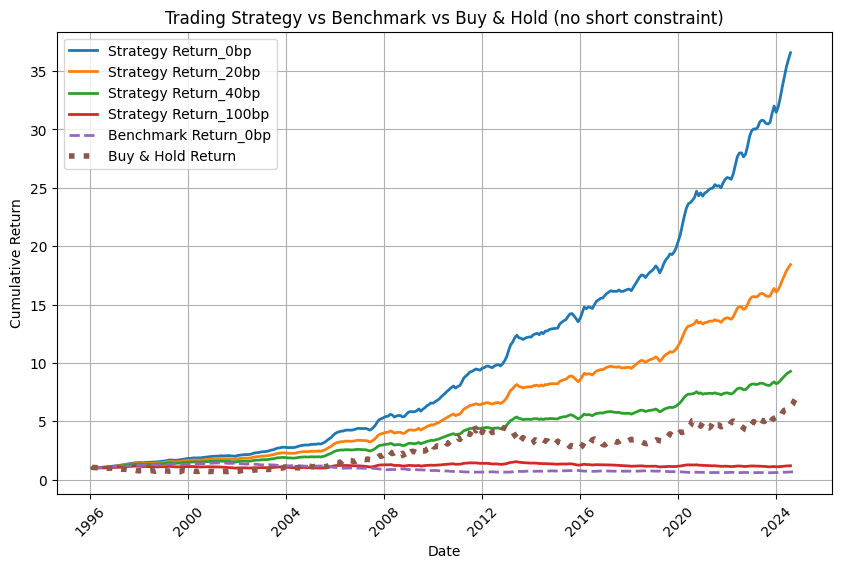

KeyError: 'cumulative_buy_and_hold'

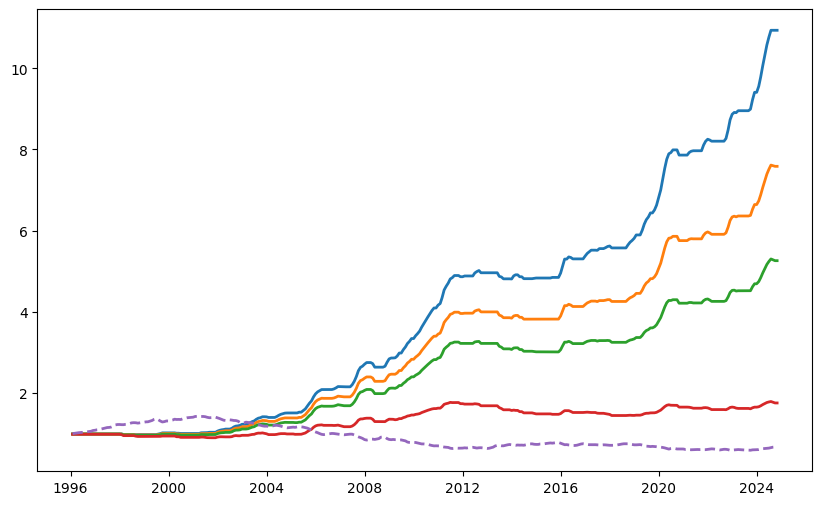

In [344]:
#### WIP: Below is the code to compare strategy performance, it's not good to use yet, has some bugs
transaction_cost=[0,0.002,0.004,0.01]
benchmark_bp=0.000
def trading_plot(learning_result,transaction_cost=[0,0.002,0.004,0.01],benchmark_bp=0.000):
    long_short_result=pd.DataFrame(learning_result)
    # Check if "Date" is already the index, if not, set it as index
    if "Date" in long_short_result.columns:
        long_short_result.set_index("Date", inplace=True)
    for tc in transaction_cost:
        # 计算策略回报
        # 获取匹配的权重值
        matching_ret = gc_data.loc[long_short_result.index, f"{GC_type}_{fwd_ret_period}M_Fwd_Ret"]
        
        # 计算策略回报
        long_short_result[f"strategy_return_{int(tc*10000)}bp"] = (
            matching_ret / fwd_ret_period * long_short_result["ret_pred"].apply(lambda x: 1 if x > 0 else -1) - tc
        )
        print(matching_ret)
        # long_short_result[f"strategy_return_{int(tc*10000)}bp"] = long_short_result["ret_real"]/fwd_ret_period * long_short_result["ret_pred"].apply(lambda x: 1 if x > 0 else -1)-tc
        long_short_result[f"cumulative_strategy_{int(tc*10000)}bp"] = np.exp(long_short_result[f"strategy_return_{int(tc*10000)}bp"].cumsum())
    
    
    # 计算基准回报
    long_short_result["benchmark_return"] = long_short_result["ret_real"]/fwd_ret_period * long_short_result["historical_mean"].apply(lambda x: 1 if x > 0 else -1)-benchmark_bp
    
    # 计算买入持有回报
    long_short_result["buy_and_hold_return"] = gc_data[f"{GC_type}_Monthly_raw_Return"].loc[long_short_result.index]
    
    # 计算累积收益
    long_short_result["cumulative_benchmark"] = np.exp(long_short_result["benchmark_return"].cumsum())
    long_short_result["cumulative_buy_and_hold"] = np.exp(long_short_result["buy_and_hold_return"].cumsum())
    
    # 绘制收益曲线
    plt.figure(figsize=(10, 6))
    for tc in transaction_cost:
        plt.plot(long_short_result.index, long_short_result[f"cumulative_strategy_{int(tc*10000)}bp"], label=f"Strategy Return_{int(tc*10000)}bp", linewidth=2)
    plt.plot(long_short_result.index, long_short_result["cumulative_benchmark"], label=f"Benchmark Return_{int(benchmark_bp*10000)}bp", linestyle="--", linewidth=2)
    plt.plot(long_short_result.index, long_short_result["cumulative_buy_and_hold"], label="Buy & Hold Return", linestyle=":", linewidth=4)
    
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.title("Trading Strategy vs Benchmark vs Buy & Hold (no short constraint)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    long_result=pd.DataFrame(learning_result)
    if "Date" in long_result.columns:
        long_result.set_index("Date", inplace=True)
    for tc in transaction_cost:
        # 计算策略回报
        matching_ret = gc_data.loc[long_result.index, f"{GC_type}_{fwd_ret_period}M_Fwd_Ret"].fillna(0)
    
        # 处理预测信号，避免除以 0
        pred_signals = long_result["ret_pred"].apply(lambda x: 1 if x > 0 else np.nan)  # 让非多头变成 NaN
        
        # 计算策略回报
        long_result[f"strategy_return_{int(tc*10000)}bp"] = (matching_ret / fwd_ret_period * pred_signals - tc).fillna(0)
        # matching_ret = gc_data.loc[long_result.index, f"{GC_type}_{fwd_ret_period}M_Fwd_Ret"]
        # 
        # # 计算策略回报
        # long_result[f"strategy_return_{int(tc*10000)}bp"] = (
        #     matching_ret / (fwd_ret_period * long_result["ret_pred"].apply(lambda x: 1 if x > 0 else 0)).apply(lambda x:x-tc if x!=0 else x)
        # )
        # long_result[f"strategy_return_{int(tc*10000)}bp"] = (long_result["ret_real"]/fwd_ret_period * long_result["ret_pred"].apply(lambda x: 1 if x > 0 else 0)).apply(lambda x:x-tc if x!=0 else x)
        long_result[f"cumulative_strategy_{int(tc*10000)}bp"] = np.exp(long_result[f"strategy_return_{int(tc*10000)}bp"].cumsum())
    
    
    # 计算基准回报
    long_result["benchmark_return"] = long_result["ret_real"]/fwd_ret_period * long_result["historical_mean"].apply(lambda x: 1 if x > 0 else -1)-benchmark_bp
    
    # 计算买入持有回报
    long_result["buy_and_hold_return"] = gc_data[f"{GC_type}_Monthly_raw_Return"].loc[long_result.index]
    
    # 计算累积收益
    long_result["cumulative_benchmark"] = np.exp(long_result["benchmark_return"].cumsum())
    long_result["cumulative_buy_and_hold"] = np.exp(long_result["buy_and_hold_return"].cumsum())
    
    # 绘制收益曲线
    plt.figure(figsize=(10, 6))
    for tc in transaction_cost:
        plt.plot(long_result.index, long_result[f"cumulative_strategy_{int(tc*10000)}bp"], label=f"Strategy Return_{int(tc*10000)}bp", linewidth=2)
    plt.plot(long_result.index, long_result["cumulative_benchmark"], label=f"Benchmark Return_{int(benchmark_bp*10000)}bp", linestyle="--", linewidth=2)
    plt.plot(long_result.index, learning_result["cumulative_buy_and_hold"], label="Buy & Hold Return", linestyle=":", linewidth=4)
    
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.title("Trading Strategy vs Benchmark vs Buy & Hold (long only)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    # print(performance_metrics)
trading_plot(LASSO_result)

In [ ]:
# 计算指标
performance_metrics = []

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    """ 计算夏普率 """
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std() if excess_returns.std() != 0 else np.nan

def calculate_max_drawdown(cumulative_returns):
    """ 计算最大回撤 """
    peak   = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

for tc in transaction_cost:
    col_name_return = f"strategy_return_{int(tc*10000)}bp"
    col_name_cum = f"cumulative_strategy_{int(tc*10000)}bp"

    final_net_value = forest_results[col_name_cum].iloc[-1]
    annualized_return = forest_results[col_name_return].mean() * 12
    sharpe_ratio = calculate_sharpe_ratio(forest_results[col_name_return])
    max_drawdown = calculate_max_drawdown(forest_results[col_name_cum])
    
    performance_metrics.append(["Strategy", f"{int(tc*10000)}bp", final_net_value, annualized_return, sharpe_ratio, max_drawdown])

# 计算基准策略的绩效
final_net_value_benchmark = forest_results["cumulative_benchmark"].iloc[-1]
annualized_return_benchmark = forest_results["benchmark_return"].mean() * 12
sharpe_ratio_benchmark = calculate_sharpe_ratio(forest_results["benchmark_return"])
max_drawdown_benchmark = calculate_max_drawdown(forest_results["cumulative_benchmark"])
performance_metrics.append(["Benchmark", f"{int(benchmark_bp*10000)}bp", final_net_value_benchmark, annualized_return_benchmark, sharpe_ratio_benchmark, max_drawdown_benchmark])

# 计算买入持有策略的绩效
final_net_value_bh = forest_results["cumulative_buy_and_hold"].iloc[-1]
annualized_return_bh = forest_results["buy_and_hold_return"].mean() * 12
sharpe_ratio_bh = calculate_sharpe_ratio(forest_results["buy_and_hold_return"])
max_drawdown_bh = calculate_max_drawdown(forest_results["cumulative_buy_and_hold"])
performance_metrics.append(["Buy & Hold", "-", final_net_value_bh, annualized_return_bh, sharpe_ratio_bh, max_drawdown_bh])

# 创建结果 DataFrame
performance_df = pd.DataFrame(performance_metrics, columns=["Strategy", "Transaction Cost", "Final Net Value", "Annualized Return", "Sharpe Ratio", "Max Drawdown"])

performance_df

-----

## Placeholder

In [ ]:
# **Expanding Window 回归**
start_train = 100   #amount of training datapoints in the beginning 初始训练数据量

# LASSO Regularization
scaler = StandardScaler() #standarized by z score
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
n_obs = len(Y)

# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林
# model = SVR(kernel='rbf')  # 支持向量回归
# 存储每个时间步的预测值、历史均值误差和真实值
results = []

# 存储模型的统计结果
model_summaries = []

## ___________________________

## <font color="yellow">Previous Work - Sicheng</font>

### Placeholder

##### **<font color= #90EE90>(Place holder) Split dataframe into X and Y</font>** 

In [ ]:
# Separate Gold Price Futures Data
import pandas as pd

gc_data = combined_df_by_month.iloc[:, :32]
x_variables_data = combined_df_by_month.iloc[:, 32:56]
x_variables_data
gc_data

##### Sharpe Ratio

In [ ]:
# Ensure required columns exist before calculation
required_cols = ['GC1_Monthly_Excess_Return', 'GC1_volatility', 'GC2_Monthly_Excess_Return', 'GC2_volatility']
missing_cols = [col for col in required_cols if col not in gc_data.columns]
if missing_cols:
    raise ValueError(f"Missing required columns in gc_data: {missing_cols}")

# Compute Sharpe ratios and store in gc_data
gc_data['GC1_sharpe'] = gc_data['GC1_Monthly_Excess_Return']*12 / gc_data['GC1_volatility']
gc_data['GC2_sharpe'] = gc_data['GC2_Monthly_Excess_Return']*12 / gc_data['GC2_volatility']
gc_data

In [ ]:
# Consider lag in x regressors
x_variables_data=x_variables_data.shift(1)
x_variables_data["PCE CYOY Index"]=x_variables_data["PCE CYOY Index"].shift(1)
x_variables_data["GDP_Nominoal_YOY"]=x_variables_data["GDP_Nominoal_YOY"].shift(1)
x_variables_data["GDP_Real_QoQ"]=x_variables_data["GDP_Real_QoQ"].shift(1)
x_variables_data["CPI_YoY"]=x_variables_data["CPI_YoY"].shift(1)
x_variables_data["US_Unemp"]=x_variables_data["US_Unemp"].shift(1)
x_variables_data["PPI"]=x_variables_data["PPI"].shift(1)
x_variables_data

##### **<font color= #90EE90>4.2 Train model</font>** 

##### Below is the code to run individual OLS regression on Y, already stopped to use, use LASSO instead

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit

# Ensure Date is datetime index
gc_data.index = pd.to_datetime(gc_data.index, format='%Y-%m')
x_variables_data.index = pd.to_datetime(x_variables_data.index, format='%Y-%m')

# Ensure both DataFrames are sorted by date
gc_data = gc_data.sort_index()
x_variables_data = x_variables_data.sort_index()

# Target variable 
y = gc_data['GC2_12M_Fwd_Ret'].dropna(how='all')

# Predictor variables (all columns from x_variables_data)
# Align predictor variables (X) to y's index
X = x_variables_data.copy().loc[y.index]  # Only keep rows where y has data

# Define number of folds
n_splits = 10  

# Dictionary to store statistics
t_values = {col: [] for col in X.columns}
p_values = {col: [] for col in X.columns}
significant_counts = {col: 0 for col in X.columns}
coefficients = {col: [] for col in X.columns}  # Store regression coefficients
r2_values = {col: [] for col in X.columns}  # Store R² values

# Iterate over each feature independently
for feature in X.columns:
    # Extract the specific feature column
    X_feature = X[[feature]].dropna()  # Remove NaNs for this feature

    # Align y with available X data
    y_feature = y.loc[X_feature.index]

    # Ensure at least `n_splits` * 2 data points exist
    if len(X_feature) < n_splits * 2:
        continue  # Skip this feature if not enough data points

    # Define rolling window TimeSeriesSplit only for this feature's data range
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Perform rolling window time series validation
    for train_idx, test_idx in tscv.split(X_feature):
        X_train, X_test = X_feature.iloc[train_idx], X_feature.iloc[test_idx]
        y_train, y_test = y_feature.iloc[train_idx], y_feature.iloc[test_idx]

        # Skip if no valid training data
        if len(X_train) == 0 or len(y_train) == 0:
            continue

        # Add intercept term
        X_train_with_const = sm.add_constant(X_train)

        # Fit OLS model
        model = sm.OLS(y_train, X_train_with_const).fit()

        # Extract regression results
        coef = model.params[feature]
        t_stat = model.tvalues[feature]
        p_value = model.pvalues[feature]
        r2 = model.rsquared

        # Store results
        coefficients[feature].append(coef)
        t_values[feature].append(t_stat)
        p_values[feature].append(p_value)
        r2_values[feature].append(r2)

        # If p-value < 0.05/len(X.columns), count as significant
        if p_value < (0.05):  # Bonferroni correction
            significant_counts[feature] += 1

# Create a DataFrame to store regression results
t_test_results = pd.DataFrame({
    "Mean_t_value": {col: np.nanmean(np.abs(t_values[col])) for col in X.columns},  # Mean t-value
    "Mean_p_value": {col: np.nanmean(p_values[col]) for col in X.columns},  # Mean p-value
    "Significant_fold_count": significant_counts,  # Count of significant folds
    "Mean_coefficient": {col: np.nanmean(coefficients[col]) for col in X.columns},  # Mean coefficient
    "Mean_R2": {col: np.nanmean(r2_values[col]) for col in X.columns}  # Mean R² value
})

# Sort by significance count
t_test_results = t_test_results.sort_values(by="Significant_fold_count", ascending=False)
t_test_results



##### Placeholder: This is to find out which variables is significant, stopped to use as well

In [ ]:
# Get the list of significant column names from t_test_results
significant_columns = t_test_results.loc[t_test_results['Significant_fold_count'] >= 1].index.tolist()

# Keep only the columns in x_variables_data that match the significant columns
filtered_x_variables_data = x_variables_data[significant_columns]
# Fill NaN values with 0
filtered_x_variables_data = filtered_x_variables_data.fillna(0)
filtered_x_variables_data

#### Below is an OLS regression for all the Xs against Y, stopped to use as well

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit

# Target variable
y = gc_data['GC1_12M_Fwd_Ret'].dropna(how='all')
# Predictor variables
X = filtered_x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  # Add intercept term

n_splits = 10  

# Store model summaries
model_summaries = []

if len(X) >= n_splits * 2:
    tscv = TimeSeriesSplit(n_splits=n_splits)
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if X_train.empty or y_train.empty:
            print("Warning: X_train or y_train is empty, skipping this fold.")
            continue

        # Fit OLS regression model
        model = sm.OLS(y_train, X_train).fit()

        # Store model summary
        model_summaries.append(model.summary())

# Print the summary for the last fold (for inspection)
if model_summaries:
    print(model_summaries[-1])  # Output last model summary
else:
    print("No valid models were fitted.")


##### **<font color= #90EE90>4.3 Regularization</font>** 

##### **[IN USE] LASSO regression - To find all the variable that is useful**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Target variable
y = gc_data['GC1_3M_Fwd_Ret'].dropna(how='all')
#y = gc_data['GC1_Monthly_Excess_Return'].dropna(how='all')


y_historical_mean_data=gc_data['GC1_Monthly_Excess_Return'].dropna(how='all')
fwd_ret_period=6
# Predictor variable
X = x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  #Intercept

# No. of Splits
n_splits = 10  

# LASSO Regularization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

# Cross Validation
if len(X_scaled) >= n_splits * 2:
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Record the regression statistics for each fold of CV - 记录每个折叠的回归系数
    lasso_coefficients = []

    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if X_train.empty or y_train.empty:
            print("Warning: X_train or y_train is empty, skipping this fold.")
            continue

        # Use LASSO CV to choose the best alpha option - 使用 LASSO 交叉验证选择最佳 alpha
        lasso_cv = LassoCV(cv=tscv, random_state=42).fit(X_train, y_train)
        best_alpha = lasso_cv.alpha_

        # Use the best alpha option to train the LASSO model - 使用最佳 alpha 训练 LASSO 模型
        lasso = Lasso(alpha=best_alpha).fit(X_train, y_train)

        # Save Lasso coefficient series 存储回归系数
        lasso_coefficients.append(pd.Series(lasso.coef_, index=X.columns))

    # Combine LASSO coefficients in a dataframe 合并所有折叠的回归系数
    lasso_coeff_df = pd.DataFrame(lasso_coefficients)
    
    # Calculate the average of LASSO coefficients 计算平均系数
    avg_lasso_coeff = lasso_coeff_df.mean()
    
    # Filter out LASSO coefficients that are larger than 0 选择非零系数的特征
    selected_features = avg_lasso_coeff[avg_lasso_coeff != 0].index.tolist()
    # Print Lasso Results 输出 LASSO 选择的变量及其系数
    print("LASSO Selected Features and Coefficients (Averaged Across Folds):")
    print(avg_lasso_coeff)

    # **Expanding Window for training**
    start_train = 300  #初始训练数据量
    n_obs = len(y)

    # Record SSE - 记录 SSE 累计误差
    SSE_model_cumsum = []
    SSE_historical_cumsum = []

    for t in range(start_train, n_obs - 1):
        # 使用当前时间 t 之前的所有数据进行训练
        X_train = X_scaled.iloc[:t]
        y_train = y.iloc[:t]
        y_historical_mean=y_historical_mean_data.iloc[:t]
        # 预测下一步 t+1
        X_test = X_scaled.iloc[t:t+1]
        y_test = y.iloc[t:t+1]
        
        # Only keeps coeff > 0 after Lasso regularization - 仅保留 LASSO 选择的变量
        if len(selected_features) > 0:
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            # Add constant - 添加截距项
            X_train_selected = sm.add_constant(X_train_selected)
            X_test_selected = sm.add_constant(X_test_selected)

            # **确保测试数据的列顺序与训练数据一致**
            X_test_selected = X_test_selected.reindex(columns=X_train_selected.columns, fill_value=0)

            # 进行 OLS 回归
            ols_model = sm.OLS(y_train, X_train_selected).fit()
            y_pred = ols_model.predict(X_test_selected)

            # 计算策略预测误差 f_t+1
            forecast_error = float(y_test - y_pred)
        else:
            # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
            forecast_error = float(y_test - y_historical_mean.mean()*fwd_ret_period)

        # 计算历史均值预测误差 m_t+1
        historical_mean_error = float(y_test - y_historical_mean.mean()*fwd_ret_period)

        # Cumulative SSE - 累计 SSE（均方误差）
        if t == start_train:
            SSE_model_cumsum.append(forecast_error ** 2)
            SSE_historical_cumsum.append(historical_mean_error ** 2)
        else:
            SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
            SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)

    # Change of RMSE as time goes - **计算 ΔRMSE 随时间的变化**
    delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                        np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)

    # **绘制 ΔRMSE**
    plt.figure(figsize=(10, 5))
    plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')
    plt.xlabel("Time")
    plt.ylabel("ΔRMSE")
    plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
    plt.legend()
    plt.show()


##### --- Duplicate Sicheng's Work by Alfred ---

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Target variable
y = gc_data['GC1_3M_Fwd_Ret'].dropna(how='all')
#y = gc_data['GC1_Monthly_Excess_Return'].dropna(how='all')



y_historical_mean_data=gc_data['GC1_Monthly_Excess_Return'].dropna(how='all')
fwd_ret_period=6
# Predictor variable
X = x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  #Intercept

# No. of Splits
n_splits = 10  

# LASSO Regularization
scaler = StandardScaler() #standarized by z score
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)


#checking 
#check_df = pd.DataFrame([gc_data['GC1_Monthly_Excess_Return'],y]).T
#check_df
y_historical_mean_data.head(30)

X
#X_scaled
x_variables_data #with 1 month lag for the actual data

In [ ]:

# Cross Validation
if len(X_scaled) >= n_splits * 2: #split it into 10 folds
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Record the regression statistics for each fold of CV - 记录每个折叠的回归系数
    lasso_coefficients = []

    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if X_train.empty or y_train.empty:
            print("Warning: X_train or y_train is empty, skipping this fold.")
            continue

        # Use LASSO CV to choose the best alpha option - 使用 LASSO 交叉验证选择最佳 alpha
        lasso_cv = LassoCV(cv=tscv, random_state=42).fit(X_train, y_train)
        best_alpha = lasso_cv.alpha_ #smallest Lasso alpha means best fit of the model
        #print(best_alpha)
        
        # Use the best alpha option to train the LASSO model - 使用最佳 alpha 训练 LASSO 模型
        lasso = Lasso(alpha=best_alpha).fit(X_train, y_train)

        # Save Lasso coefficient series 存储回归系数
        lasso_coefficients.append(pd.Series(lasso.coef_, index=X.columns))

    # Combine LASSO coefficients in a dataframe 合并所有折叠的回归系数
    lasso_coeff_df = pd.DataFrame(lasso_coefficients)
    print(lasso_coeff_df)
    
    # Calculate the average of LASSO coefficients 计算平均系数
    avg_lasso_coeff = lasso_coeff_df.mean()
    
    # Filter out LASSO coefficients that are larger than 0 选择非零系数的特征
    selected_features = avg_lasso_coeff[avg_lasso_coeff != 0].index.tolist()
    # Print Lasso Results 输出 LASSO 选择的变量及其系数
    
    print("\n\nLASSO Selected Features and Coefficients (Averaged Across Folds):")
    print(avg_lasso_coeff)
    
    print("\n\nThe selected features by the LASSO models are:") 
    shortern_dict = avg_lasso_coeff.to_dict()
    features_list = [key for key, val in shortern_dict.items() if val !=0]
    print(features_list)
    
    

    # **Expanding Window for training**
    start_train = 300  #初始训练数据量
    n_obs = len(y)

    # Record SSE - 记录 SSE 累计误差
    SSE_model_cumsum = []
    SSE_historical_cumsum = []


In [ ]:
print(selected_features)

In [ ]:


for t in range(start_train, n_obs - 1):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean=y_historical_mean_data.iloc[:t]
    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]
    
    
    # Only keeps coeff > 0 after Lasso regularization - 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]
        #print(X_train_selected.columns)

        # Add constant - 添加截距项
        X_train_selected = sm.add_constant(X_train_selected)
        X_test_selected = sm.add_constant(X_test_selected)

        # **确保测试数据的列顺序与训练数据一致**
        X_test_selected = X_test_selected.reindex(columns=X_train_selected.columns, fill_value=0)

        # 进行 OLS 回归
        ols_model = sm.OLS(y_train, X_train_selected).fit()
        y_pred = ols_model.predict(X_test_selected)

        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean()*fwd_ret_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean()*fwd_ret_period)

    # Cumulative SSE - 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)

# Change of RMSE as time goes - **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1)


In [ ]:
# **绘制 ΔRMSE**

plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')
plt.xlabel("Time")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()


#### (In use)Below is using the variables that proofed Useful by LASSO and perform a time-series forecasting using Random Forest

In [ ]:
import platform
import sys

print("Python executable:", sys.executable)
print("Architecture:", platform.architecture())

In [ ]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# **Expanding Window 回归**
start_train = 30  # 初始训练数据量
n_obs = len(y)
fwd_ret_period=3
sign_threshold = 0.90  # 阈值：90% 以上的时间步符号一致
# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林
# model = SVR(kernel='rbf')  # 支持向量回归
# 存储每个时间步的预测值、历史均值误差和真实值
results = []
# 存储模型的统计结果
model_summaries = []
for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]

    # 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # 训练机器学习回归模型
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # 获取单个预测值
        # 获取特征重要性
        if hasattr(model, "feature_importances_"):  # 适用于随机森林、XGBoost
            feature_importance = model.feature_importances_
        else:
            # 使用 statsmodels 重新拟合以获取系数
            X_train_sm = sm.add_constant(X_train_selected)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            feature_importance = ols_model.params[1:].values  # 跳过截距项

        # 记录当前时间步的特征重要性
        feature_importance_per_step.append(dict(zip(selected_features, feature_importance)))
        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    results.append({
        "Time Index": y.index[t],
        "y_test": float(y_test),
        "y_pred": float(y_pred),
        "historical_mean_error": y_historical_mean.mean() * fwd_ret_period
    })
results=pd.DataFrame(results)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)
# **转换特征重要性 DataFrame**
df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)

# **计算特征在所有时间步的重要性均值**
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
# **计算模型的整体统计信息**
y_pred_all = model.predict(X_train_selected)

# 计算 R²、MSE、RMSE
r2 = r2_score(y_train, y_pred_all)
mse = mean_squared_error(y_train, y_pred_all)
rmse = np.sqrt(mse)

# 提取特征重要性
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(X_train_selected.columns, model.feature_importances_))
elif isinstance(model, XGBRegressor):
    feature_importance = model.get_booster().get_score(importance_type='weight')
else:
    feature_importance = "N/A"

# 组织统计结果
model_summary = {
    "Model": type(model).__name__,
    "R-squared": r2,
    "MSE": mse,
    "RMSE": rmse,
    "Feature Importance": feature_importance
}

# 将统计结果转换为 DataFrame
df_model_summary = pd.DataFrame({
    "Metric": ["R-squared", "MSE", "RMSE"],
    "Value": [r2, mse, rmse]
})

# 显示表格
print(df_model_summary)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()


In [ ]:
df_feature_avg_importance

In [ ]:
results=pd.DataFrame(results)
# 设置时间索引
results.set_index("Time Index", inplace=True)
results.index.name = "Date"
results

In [ ]:
results

#### Alfred Redo with fewer parameters

In [ ]:
selected_features_2 = ['SPX Index',
 'CPI YOY Index',
 'GDP_Nominoal_YOY',
 'GDP_Real_QoQ',
 'US_Unemp',
 'US_RIR']

 # select one between 'GDP_Real_QoQ' or 'GDP_Nominoal_YOY'

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# **Expanding Window 回归**
start_train = 30  # 初始训练数据量
n_obs = len(y)
sign_threshold = 0.90  # 阈值：90% 以上的时间步符号一致
# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost

#Use Random Forest for Prediction
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林


# model = SVR(kernel='rbf')  # 支持向量回归
# 存储每个时间步的预测值、历史均值误差和真实值
results = []
# 存储模型的统计结果
model_summaries = []

for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]

    # 仅保留 LASSO 选择的变量
    
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features_2]
        X_test_selected = X_test[selected_features_2]

        # 训练机器学习回归模型
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # 获取单个预测值
        # 获取特征重要性
        if hasattr(model, "feature_importances_"):  # 适用于随机森林、XGBoost
            feature_importance = model.feature_importances_
        else:
            # 使用 statsmodels 重新拟合以获取系数
            X_train_sm = sm.add_constant(X_train_selected)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            feature_importance = ols_model.params[1:].values  # 跳过截距项

        # 记录当前时间步的特征重要性
        feature_importance_per_step.append(dict(zip(selected_features, feature_importance)))
        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    results.append({
        "Time Index": y.index[t],
        "y_test": float(y_test),
        "y_pred": float(y_pred),
        "historical_mean_error": y_historical_mean.mean() * fwd_ret_period
    })
results=pd.DataFrame(results)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)
# **转换特征重要性 DataFrame**
df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)

# **计算特征在所有时间步的重要性均值**
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
# **计算模型的整体统计信息**
y_pred_all = model.predict(X_train_selected)

# 计算 R²、MSE、RMSE
r2 = r2_score(y_train, y_pred_all)
mse = mean_squared_error(y_train, y_pred_all)
rmse = np.sqrt(mse)

# 提取特征重要性
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(X_train_selected.columns, model.feature_importances_))
elif isinstance(model, XGBRegressor):
    feature_importance = model.get_booster().get_score(importance_type='weight')
else:
    feature_importance = "N/A"

# 组织统计结果
model_summary = {
    "Model": type(model).__name__,
    "R-squared": r2,
    "MSE": mse,
    "RMSE": rmse,
    "Feature Importance": feature_importance
}

# 将统计结果转换为 DataFrame
df_model_summary = pd.DataFrame({
    "Metric": ["R-squared", "MSE", "RMSE"],
    "Value": [r2, mse, rmse]
})

# 显示表格
print(df_model_summary)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()


In [ ]:
model_summary

In [ ]:
results

## <font color="yellow"> Time Series TSM - Alfred </font>

#### Step 0: Continue from Time Series Dataframe in Previous Work

In [ ]:
#View Gold price futures data
gc_data
gc_data.to_csv("gc_data_raw.csv")

#gc_data.columns

#### Step 1: Modify Dataframe

##### <font color= #90EE90> 1.1: Formulate Next Month (Actual) Sharpe Ratio </font> 

In [ ]:
#Create new copy specifically for time series moementum strategy
gc_data.rename(columns={'GC1_volatility':'GC1_vol_annualized','GC2_volatility':'GC2_vol_annualized'},inplace=True)
gc_data_new = gc_data.copy()

#Calculate Actual Sharpe Ratio - Monthly
gc_data_new['GC1_vol_monthly'] = gc_data_new['GC1_vol_annualized']/ np.sqrt(12)
gc_data_new['GC2_vol_monthly'] = gc_data_new['GC2_vol_annualized']/ np.sqrt(12)

#Produce 1 Month historical and forward (actual) Sharpe Ratio
gc_data_new.rename(columns={'GC1_sharpe':'GC1_sharpe_1M_Hist','GC2_sharpe':'GC2_sharpe_1M_Hist'},inplace=True)
gc_data_new['GC1_sharpe_1M_Hist'] = gc_data_new['GC1_Monthly_Excess_Return']/gc_data_new['GC1_vol_monthly']
gc_data_new['GC2_sharpe_1M_Hist'] = gc_data_new['GC2_Monthly_Excess_Return']/gc_data_new['GC2_vol_monthly']
gc_data_new['GC1_sharpe_1M_RetHist_VolLag1'] = gc_data_new['GC1_Monthly_Excess_Return']/gc_data_new['GC1_vol_monthly'].shift(1)
gc_data_new['GC2_sharpe_1M_RetHist_VolLag1'] = gc_data_new['GC2_Monthly_Excess_Return']/gc_data_new['GC2_vol_monthly'].shift(1)

gc_data_new['GC1_sharpe_1M_Fwd'] = gc_data_new['GC1_sharpe_1M_Hist'].shift(1)
gc_data_new['GC2_sharpe_1M_Fwd'] = gc_data_new['GC2_sharpe_1M_Hist'].shift(1)

#Export CSV
gc_data_new.to_csv("gc_data_v1.csv")
gc_data_new




##### <font color= #90EE90> 1.2: Shift 1 month for 3M, 6M, 12M Return Sign  </font> 

In [ ]:
shift_columns_gc_all = ["GC1_1M_Sign","GC2_1M_Sign",'GC1_3M_Sign','GC2_3M_Sign','GC1_6M_Sign','GC2_6M_Sign','GC1_12M_Sign','GC2_12M_Sign']
shift_columns_gc2= ["GC2_1M_Sign",'GC2_3M_Sign','GC2_6M_Sign','GC2_12M_Sign']
shift_col_exp_1M = ['GC1_3M_Sign','GC2_3M_Sign','GC1_6M_Sign','GC2_6M_Sign','GC1_12M_Sign','GC2_12M_Sign']

for col in shift_columns_gc_all:
    x_variables_data[col+'_lag_1']=gc_data_new[col].shift(1)

for col in shift_col_exp_1M:
    x_variables_data[col+'_lag_2']=gc_data_new[col].shift(2)

x_variables_data.to_csv("gc_data_v2_20250215.csv")
x_variables_data

#### Step 2: Create Train-Calibrate-Test Split Dataset

##### <font color= #90EE90> _2.1: Separate dataframes_ </font> 

In [ ]:
# GC2_Features = ['GC2_1M_Sign_lag_1','GC2_3M_Sign_lag_1','GC2_6M_Sign_lag_1','GC2_12M_Sign_lag_1']
# GC1_Features = ['GC1_1M_Sign_lag_1','GC1_3M_Sign_lag_1','GC1_6M_Sign_lag_1','GC1_12M_Sign_lag_1']
# 
# #gc2 only
# xy_tsm = gc_data_new[['GC2_sharpe_1M_Hist']+ ['GC2_sharpe_1M_Fwd'] + ['GC2_sharpe_1M_RetHist_VolLag1'] + GC2_Features].dropna(how='any')
# 
# y_tsm = pd.DataFrame()
# 
# y_tsm['GC2_sharpe_1M_RetT_VolT-1'] = xy_tsm['GC2_sharpe_1M_RetHist_VolLag1']
# x_tsm = xy_tsm[[col for col in GC2_Features]]
# 
# #checking
# #x_tsm
# 
# y_tsm.to_csv("y_tsm.csv")
# 
# y_tsm
# 
# #xy_tsm


##### <font color= #90EE90> _2.2: Define Cross Validation Fold_ </font> 

Method: Rolling folds that trains every month

In [ ]:
train_start = pd.Timestamp('1976-01-31')
train_end = pd.Timestamp('1990-12-31')  #initial training period

calib_start = pd.Timestamp('1991-01-31') 
calib_end = pd.Timestamp('1995-12-31') 

test_date = calib_end + pd.DateOffset(months=1)


#### Step 3: Train Model

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm


##### **Test Code (1 iteration)**

In [ ]:
"""
#Design rolling loop algorithm

results = []

#while test_date <= pd.Timestamp('2010-12-31'):
    
#create train dataset
x_tsm_train = x_tsm.loc[:train_end]
y_tsm_train = y_tsm.loc[:train_end]

#create calibration dataset
x_tsm_calib = x_tsm.loc[calib_start:calib_end]
y_tsm_calib = y_tsm.loc[calib_start:calib_end]

#test data
x_tsm_test = x_tsm.loc[test_date:test_date]

#define alpha and error before loop
best_alpha = None
least_error = np.inf

#checking
x_tsm_train

"""

In [ ]:
"""
for a in alphas:
    if regression_type == 'ridge':
        candidate_model = Ridge(alpha= a)
    else: #assume lasso
        candidate_model = Lasso(alpha= a, max_iter=2000)
        
#fit the model in the calibration set
candidate_model.fit(x_tsm_train, y_tsm_train)
y_tsm_pred = candidate_model.predict(x_tsm_calib)
error = mean_squared_error(y_tsm_calib,y_tsm_pred)

if error < least_error:
    least_error = error
    best_alpha = a

#combine training and calibration set
x_tsm_tracal_combined = pd.concat([x_tsm_train,x_tsm_calib])
y_tsm_tracal_combined = pd.concat([y_tsm_train,y_tsm_calib])

#train the final model with the best alpha over training + calibration timeframe
if regression_type == 'ridge':
    final_model = Ridge(alpha= best_alpha)
else: #assume lasso
    final_model = Lasso(alpha= best_alpha, max_iter=2000)

final_model.fit(x_tsm_tracal_combined, y_tsm_tracal_combined)


#forecasting the test month
forecast = final_model.predict(x_tsm_test)[0]
realized = x_tsm_test.iloc[0,0]

#iteration results
results.append({
    'train_end': train_end,
    'calib_start': calib_start,
    'calib_end': calib_end,
    'test_date': test_date,
    'best_alpha': best_alpha,
    'forecast': forecast,
    'realized': realized,
    'calib_error': least_error
})

#expand the windows for next interation
#train - calibrate - test split
train_end = train_end + pd.DateOffset(months=1) #Expand 1 month
calib_start = calib_start + pd.DateOffset(months=1)  #Slide 1 month
calib_end = test_date                              #Slide 1 month (i.e. previous test date)
test_date = test_date + pd.DateOffset(months=1) #Slide to next month for prediction
    
#results_df = pd.DataFrame(results)

results
"""

##### **While-Loop Iteration**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm

train_start = pd.Timestamp('1976-01-31')
train_end = pd.Timestamp('1990-12-31')  #initial training period
calib_start = pd.Timestamp('1991-01-31') 
calib_end = pd.Timestamp('1995-12-31') 
test_date = calib_end + pd.DateOffset(months=1)

regression_type = 'lasso'
alphas = np.logspace(4,-4,100).tolist()
#alphas

In [ ]:
#Design rolling loop algorithm
GC2_Features = ['GC2_1M_Sign_lag_1','GC2_3M_Sign_lag_1','GC2_6M_Sign_lag_1','GC2_12M_Sign_lag_1']
GC1_Features = ['GC1_1M_Sign_lag_1','GC1_3M_Sign_lag_1','GC1_6M_Sign_lag_1','GC1_12M_Sign_lag_1']
results = []
y_tsm=pd.DataFrame(gc_data_new["GC2_sharpe_1M_RetHist_VolLag1"].dropna(how="all"))
x_tsm = x_variables_data[[col for col in GC2_Features]].fillna(0).copy().loc[y_tsm.index]
#apply tqdm for manual progress bar
pbar = tqdm(total=y_tsm.loc[test_date:].shape[0], desc="Rolling Window Iterations")
i=1

while test_date <= y_tsm.index[-1]:
    
    """
    print(f"\n\n--------\nIteration {i} starts....")
    print("Current training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    
    #create train dataset
    x_tsm_train = x_tsm.loc[:train_end]
    y_tsm_train = y_tsm.loc[:train_end]

    #create calibration dataset
    x_tsm_calib = x_tsm.loc[calib_start:calib_end]
    y_tsm_calib = y_tsm.loc[calib_start:calib_end]

    #test data
    x_tsm_test = x_tsm.loc[test_date:test_date]
    y_tsm_test = y_tsm.loc[test_date:test_date]

    #define alpha and error before loop
    best_alpha = None
    least_error = np.inf

    #checking
    x_tsm_train

    for a in alphas:
        if regression_type == 'ridge':
            candidate_model = Ridge(alpha= a)
        else: #assume lasso
            candidate_model = Lasso(alpha= a, max_iter=1000)
            
        #fit the model in the calibration set
        candidate_model.fit(x_tsm_train, y_tsm_train)
        y_tsm_pred = candidate_model.predict(x_tsm_calib)
        error = mean_squared_error(y_tsm_calib,y_tsm_pred)

        if error < least_error:
            least_error = error
            best_alpha = a

    #combine training and calibration set
    x_tsm_tracal_combined = pd.concat([x_tsm_train,x_tsm_calib])
    y_tsm_tracal_combined = pd.concat([y_tsm_train,y_tsm_calib])

    #train the final model with the best alpha over training + calibration timeframe
    if regression_type == 'ridge':
        final_model = Ridge(alpha= best_alpha)
    else: #assume lasso
        final_model = Lasso(alpha= best_alpha, max_iter=1000)

    final_model.fit(x_tsm_tracal_combined, y_tsm_tracal_combined)
    #forecasting the test month
    forecast = final_model.predict(x_tsm_test)[0]
    realized = y_tsm_test.iloc[0,0]

    #iteration results
    results.append({
        'train_end': train_end,
        'calib_start': calib_start,
        'calib_end': calib_end,
        'test_date': test_date,
        'best_alpha': best_alpha,
        'forecast': forecast,
        'realized': realized,
        'calib_error': least_error
    })

    #expand the windows for next interation
    #train - calibrate - test split
    train_end = train_end + pd.offsets.MonthEnd(1) #Expand 1 month
    calib_start = calib_start + pd.offsets.MonthEnd(1)  #Slide 1 month
    calib_end = test_date                              #Slide 1 month (i.e. previous test date)
    test_date = test_date + pd.offsets.MonthEnd(1) #Slide to next month for prediction
    
    """
    print("\nNext training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    i = i+1
    pbar.set_description(f"Rolling Window Iterations: {i}/{y_tsm.loc[test_date:].shape[0]}")
    pbar.update(1)

pbar.close()

results_df = pd.DataFrame(results)
results_df

##### **Model Results**

In [ ]:
#results_df.to_excel("results_df_lasso1.xlsx")
results_df

#### Step 4: Evaluate Model

In [ ]:
y_tsm

##### **Calculate Historical Mean**

In [ ]:
#calcualte historical expanding mean
y_tsm_with_mean = y_tsm.copy()
y_tsm_with_mean['hist_mean_expand'] = y_tsm_with_mean['GC2_sharpe_1M_RetHist_VolLag1'].expanding(min_periods=1).mean()

#include historical expanding mean in results df
results_df_2 = results_df.copy()
results_df_2 = results_df_2.set_index('test_date')
results_df_2 = results_df_2.join(y_tsm_with_mean['hist_mean_expand'], how='left')

results_df_2

##### **Generate Evalution Statistics**

In [ ]:
#calculate RMSE, RMSE diff, cummulative RMSE diff, OOS R-Sq Stat

#SSE
results_df_2['SSE_forecast'] = (results_df_2['realized'] - results_df_2['forecast'])**2
results_df_2['SSE_hist'] = (results_df_2['realized'] - results_df_2['hist_mean_expand'])**2
# results_df_2['row_num'] = np.arange(1,len(results_df_2)+1)
num_of_rows=len(results_df_2)
#Cummulative SSE
results_df_2['Cum_SSE_forecast'] = results_df_2['SSE_forecast'].expanding(min_periods=1).sum()
results_df_2['Cum_SSE_hist'] = results_df_2['SSE_hist'].expanding(min_periods=1).sum()

#RMSE
results_df_2['RMSE_forecast'] = np.sqrt(results_df_2['SSE_forecast']/num_of_rows)
results_df_2['RMSE_hist'] = np.sqrt(results_df_2['SSE_hist']/num_of_rows)

#RMSE diff and cummulaitve RMSE diff
results_df_2['RMSE_diff'] = results_df_2['RMSE_hist'] - results_df_2['RMSE_forecast']
results_df_2['Cum_RMSE_diff'] = results_df_2['RMSE_diff'].expanding(min_periods=1).sum()

#OOS R-Sq Stat
results_df_2['R_Sq_OOS'] = 1 - (results_df_2['Cum_SSE_forecast']/ results_df_2['Cum_SSE_hist'])

results_df_2.to_csv("results_df_2_lasso1_20250213.csv")
results_df_2



##### **Plot Results**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(results_df_2.index, results_df_2['Cum_RMSE_diff'], label="OOS ΔRMSE (Historical Mean - Strategy)", color='blue')
plt.xlabel("Time")
plt.ylabel("OOS ΔRMSE")
plt.title("Out-of-Sample ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()

-----------

#### Placeholder: Below is experiment code on random forest with CALIBRATION, doesn't have good performance yet

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.isotonic import IsotonicRegression  # 替换 Logistic Regression

# **Expanding Window 回归**
start_train = 100  # 初始训练数据量
y=pd.DataFrame(gc_data_new["GC2_sharpe_1M_RetHist_VolLag1"].dropna(how="all"))
X = x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  #Intercept
y_historical_mean_data=gc_data['GC1_Monthly_Excess_Return'].dropna(how='all')
# No. of Splits
n_splits = 10  

# LASSO Regularization
scaler = StandardScaler() #standarized by z score
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
n_obs = len(y)

# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []

# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42)  # 随机森林
# model = SVR(kernel='rbf')  # 支持向量回归

# Isotonic Regression 校准模型
calibration_model = IsotonicRegression(out_of_bounds='clip')

for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # **划分训练集（80%）、校准集（20%）**
    split_idx = int(0.8 * t)  # 80% 作为训练集，20% 作为校准集
    X_train = X_scaled.iloc[:split_idx]
    y_train = y.iloc[:split_idx]

    X_calib = X_scaled.iloc[split_idx:t]
    y_calib = y.iloc[split_idx:t]

    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]
    
    # 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_calib_selected = X_calib[selected_features]
        X_test_selected = X_test[selected_features]

        # 训练回归模型
        model.fit(X_train_selected, y_train)

        # **校准步骤**
        y_calib_pred = model.predict(X_calib_selected)  # 获取校准集的预测值（scores）
        calibration_model.fit(y_calib_pred, y_calib)  # 训练 Isotonic Regression 进行校准

        # **在测试集上应用校准**
        y_pred_raw = model.predict(X_test_selected)  # 先用回归模型预测
        y_pred_calibrated = calibration_model.predict(y_pred_raw)  # 用 Isotonic Regression 进行校准
        
        forecast_error = float(y_test - y_pred_calibrated)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()



--------------

# ** ---- Sicheng 20250214 ---- **

#### Sicheng's combined code is below

In [ ]:
x_variables_data.to_excel("x_variables_data_20250214.xlsx")
x_variables_data

Processing: 100%|██████████| 494/494 [00:31<00:00, 15.61it/s]

      Metric     Value
0  R-squared  0.828629
1        MSE  0.002868
2       RMSE  0.053550


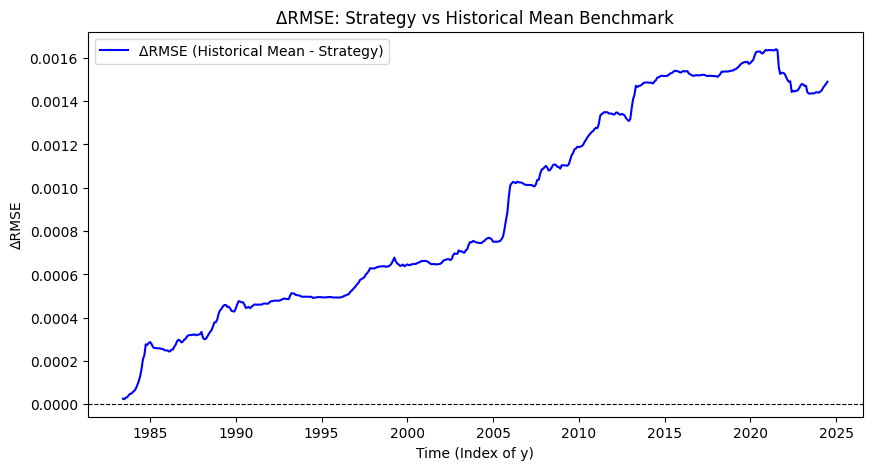

In [73]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# **Expanding Window 回归**
start_train = 100  # 初始训练数据量
fwd_ret_period=6
y=gc_data_new[f"GC1_{fwd_ret_period}M_Fwd_Ret"].dropna(how="all")
y_historical_mean_data=gc_data_new['GC1_Monthly_Excess_Return'].loc[y.index].dropna(how='all')


#shift_columns_gc2 = ["GC2_1M_Sign_lag_1", "GC2_3M_Sign_lag_1", "GC2_6M_Sign_lag_1", "GC2_12M_Sign_lag_1"]
shift_columns_gc2 = ["GC2_1M_Sign_lag_1", "GC2_3M_Sign_lag_2", "GC2_6M_Sign_lag_2", "GC2_12M_Sign_lag_2"]
#shift_columns_gc_all = ["GC1_1M_Sign_lag_1","GC2_1M_Sign_lag_1",'GC1_3M_Sign_lag_1','GC2_3M_Sign_lag_1','GC1_6M_Sign_lag_1','GC2_6M_Sign_lag_1','GC1_12M_Sign_lag_1','GC2_12M_Sign_lag_1']
shift_columns_gc_all = ["GC1_1M_Sign_lag_1","GC2_1M_Sign_lag_1",'GC1_3M_Sign_lag_2','GC2_3M_Sign_lag_2','GC1_6M_Sign_lag_2','GC2_6M_Sign_lag_2','GC1_12M_Sign_lag_2','GC2_12M_Sign_lag_2']

cols_to_merge = ['GC1_Monthly_Excess_Return', 'GC1_3M_Ret', 'GC1_6M_Ret', 'GC1_12M_Ret']

# 合并数据，使用索引进行连接（inner join）

#To do: 
# 1. Lets try shifting the return for 3M, 6M and 12M 
# 2. Let's try still using the sign first in another run 


x_variables_data = x_variables_data.drop(columns=shift_columns_gc_all, errors="ignore")
x_variables_data = x_variables_data.merge(gc_data_new[cols_to_merge].shift(1), left_index=True, right_index=True, how="left")

x_variables_data.head(20)

# LASSO Regularization
scaler = StandardScaler() #standarized by z score
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
n_obs = len(y)

# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林
# model = SVR(kernel='rbf')  # 支持向量回归
# 存储每个时间步的预测值、历史均值误差和真实值
results = []

# 存储模型的统计结果
model_summaries = []
for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]

    # 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # 训练机器学习回归模型
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # 获取单个预测值
        # 获取特征重要性
        if hasattr(model, "feature_importances_"):  # 适用于随机森林、XGBoost
            feature_importance = model.feature_importances_
        else:
            # 使用 statsmodels 重新拟合以获取系数
            X_train_sm = sm.add_constant(X_train_selected)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            feature_importance = ols_model.params[1:].values  # 跳过截距项

        # 记录当前时间步的特征重要性
        feature_importance_per_step.append(dict(zip(selected_features, feature_importance)))
        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * data_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * data_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    results.append({
        "Date": y.index[t],
        "ret_real": float(y_test),
        "ret_pred": float(y_pred),
        "historical_mean": y_historical_mean.mean() * data_period
    })
results=pd.DataFrame(results)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)
# **转换特征重要性 DataFrame**
df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)

# **计算特征在所有时间步的重要性均值**
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
# **计算模型的整体统计信息**
y_pred_all = model.predict(X_train_selected)

# 计算 R²、MSE、RMSE
r2 = r2_score(y_train, y_pred_all)
mse = mean_squared_error(y_train, y_pred_all)
rmse = np.sqrt(mse)

# 提取特征重要性
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(X_train_selected.columns, model.feature_importances_))
elif isinstance(model, XGBRegressor):
    feature_importance = model.get_booster().get_score(importance_type='weight')
else:
    feature_importance = "N/A"

# 组织统计结果
model_summary = {
    "Model": type(model).__name__,
    "R-squared": r2,
    "MSE": mse,
    "RMSE": rmse,
    "Feature Importance": feature_importance
}

# 将统计结果转换为 DataFrame
df_model_summary = pd.DataFrame({
    "Metric": ["R-squared", "MSE", "RMSE"],
    "Value": [r2, mse, rmse]
})

# 显示表格
print(df_model_summary)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()
results
delta_RMSE_series
results['ret_real']/fwd_ret_period
results
#### WIP: Below is the code to compare strategy performance, it's not good to use yet, has some bugs
transaction_cost=[0,0.002,0.004,0.01]
benchmark_bp=0.002
results=pd.DataFrame(results)
# 设置时间索引
results.set_index("Date", inplace=True)
for tc in transaction_cost:
    # 计算策略回报
    results[f"strategy_return_{int(tc*1000)}bp"] = results["ret_real"]/fwd_ret_period * results["ret_pred"].apply(lambda x: 1 if x > 0 else -1)-tc
    results[f"cumulative_strategy_{int(tc*1000)}bp"] = np.exp(results[f"strategy_return_{int(tc*1000)}bp"].cumsum())


# 计算基准回报
results["benchmark_return"] = results["ret_real"]/fwd_ret_period * results["historical_mean"].apply(lambda x: 1 if x > 0 else -1)-benchmark_bp

# 计算买入持有回报
results["buy_and_hold_return"] = gc_data_new["GC1_Monthly_Excess_Return"].loc[results.index]

# 计算累积收益
results["cumulative_benchmark"] = np.exp(results["benchmark_return"].cumsum())
results["cumulative_buy_and_hold"] = np.exp(results["buy_and_hold_return"].cumsum())

# 绘制收益曲线
plt.figure(figsize=(10, 6))
for tc in transaction_cost:
    plt.plot(results.index, results[f"cumulative_strategy_{int(tc*1000)}bp"], label=f"Strategy Return_{int(tc*1000)}bp", linewidth=2)
plt.plot(results.index, results["cumulative_benchmark"], label=f"Benchmark Return_{int(benchmark_bp*1000)}bp", linestyle="--", linewidth=2)
plt.plot(results.index, results["cumulative_buy_and_hold"], label="Buy & Hold Return", linestyle=":", linewidth=4)

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Trading Strategy vs Benchmark vs Buy & Hold (no short constraint)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()
# print(performance_metrics)
transaction_cost=[0,0.002,0.004,0.01]
benchmark_bp=0.002
results=pd.DataFrame(results)
# 设置时间索引
#results.set_index("Date", inplace=True)
for tc in transaction_cost:
    # 计算策略回报
    results[f"strategy_return_{int(tc*1000)}bp"] = (results["ret_real"]/fwd_ret_period * results["ret_pred"].apply(lambda x: 1 if x > 0 else 0)).apply(lambda x:x-tc if x!=0 else x)
    results[f"cumulative_strategy_{int(tc*1000)}bp"] = np.exp(results[f"strategy_return_{int(tc*1000)}bp"].cumsum())


# 计算基准回报
results["benchmark_return"] = results["ret_real"]/fwd_ret_period * results["historical_mean"].apply(lambda x: 1 if x > 0 else -1)-benchmark_bp

# 计算买入持有回报
results["buy_and_hold_return"] = gc_data_new["GC1_Monthly_Excess_Return"].loc[results.index]

# 计算累积收益
results["cumulative_benchmark"] = np.exp(results["benchmark_return"].cumsum())
results["cumulative_buy_and_hold"] = np.exp(results["buy_and_hold_return"].cumsum())


# 绘制收益曲线
plt.figure(figsize=(10, 6))
for tc in transaction_cost:
    plt.plot(results.index, results[f"cumulative_strategy_{int(tc*1000)}bp"], label=f"Strategy Return_{int(tc*1000)}bp", linewidth=2)
plt.plot(results.index, results["cumulative_benchmark"], label=f"Benchmark Return_{int(benchmark_bp*1000)}bp", linestyle="--", linewidth=2)
plt.plot(results.index, results["cumulative_buy_and_hold"], label="Buy & Hold Return", linestyle=":", linewidth=4)

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Trading Strategy vs Benchmark vs Buy & Hold (long only)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()
# print(performance_metrics)
# 计算指标
performance_metrics = []

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    """ 计算夏普率 """
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std() if excess_returns.std() != 0 else np.nan

def calculate_max_drawdown(cumulative_returns):
    """ 计算最大回撤 """
    peak = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

for tc in transaction_cost:
    col_name_return = f"strategy_return_{int(tc*1000)}bp"
    col_name_cum = f"cumulative_strategy_{int(tc*1000)}bp"

    final_net_value = results[col_name_cum].iloc[-1]
    annualized_return = results[col_name_return].mean() * 12
    sharpe_ratio = calculate_sharpe_ratio(results[col_name_return])
    max_drawdown = calculate_max_drawdown(results[col_name_cum])
    
    performance_metrics.append(["Strategy", f"{int(tc*1000)}bp", final_net_value, annualized_return, sharpe_ratio, max_drawdown])

# 计算基准策略的绩效
final_net_value_benchmark = results["cumulative_benchmark"].iloc[-1]
annualized_return_benchmark = results["benchmark_return"].mean() * 12
sharpe_ratio_benchmark = calculate_sharpe_ratio(results["benchmark_return"])
max_drawdown_benchmark = calculate_max_drawdown(results["cumulative_benchmark"])
performance_metrics.append(["Benchmark", f"{int(benchmark_bp*1000)}bp", final_net_value_benchmark, annualized_return_benchmark, sharpe_ratio_benchmark, max_drawdown_benchmark])

# 计算买入持有策略的绩效
final_net_value_bh = results["cumulative_buy_and_hold"].iloc[-1]
annualized_return_bh = results["buy_and_hold_return"].mean() * 12
sharpe_ratio_bh = calculate_sharpe_ratio(results["buy_and_hold_return"])
max_drawdown_bh = calculate_max_drawdown(results["cumulative_buy_and_hold"])
performance_metrics.append(["Buy & Hold", "-", final_net_value_bh, annualized_return_bh, sharpe_ratio_bh, max_drawdown_bh])

# 创建结果 DataFrame
performance_df = pd.DataFrame(performance_metrics, columns=["Strategy", "Transaction Cost", "Final Net Value", "Annualized Return", "Sharpe Ratio", "Max Drawdown"])

performance_df
